In [1]:
import ROOT
import os, re, gc, h5py
import numpy as np
import scipy as sp
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from tqdm import tqdm

from IPython.utils.capture import capture_output
from joblib import Parallel, delayed
from data_utils import *

Welcome to JupyROOT 6.20/04


In [ ]:
from joblib import Parallel, delayed
def foo(x):
    return np.linalg.eigvals(x), os.getpid()

In [ ]:
def R_etheta():

In [2]:
def line_coef(x1,x2,y1,y2):
    k = (y2-y1)/(x2-x1)
    b = y1 - k*x1
    return k,b

In [3]:
x1=2820; x2=3500
line_coef(x1,x2,151,148.5)

(-0.003676470588235294, 161.36764705882354)

In [4]:
line_coef(x1,x2,134,131)

(-0.004411764705882353, 146.44117647058823)

In [7]:
x1=8000; x2=7300
line_coef(x1,x2,151.5,156)

(-0.0064285714285714285, 202.92857142857144)

In [8]:
line_coef(x1,x2,132,138)

(-0.008571428571428572, 200.57142857142856)

In [17]:
x1=5850; x2=4850
line_coef(x1,x2,164.5,167.5)

(-0.003, 182.05)

In [18]:
line_coef(x1,x2,152.5,154)

(-0.0015, 161.275)

In [19]:
x1=4850; x2=4300
line_coef(x1,x2,167.5,165.5)

(0.0036363636363636364, 149.86363636363637)

In [20]:
line_coef(x1,x2,154,151.5)

(0.004545454545454545, 131.95454545454547)

In [21]:
x1=4300; x2=3200
line_coef(x1,x2,165.5,170.5)

(-0.004545454545454545, 185.04545454545453)

In [22]:
line_coef(x1,x2,151.5,156.5)

(-0.004545454545454545, 171.04545454545453)

In [23]:
x1=3200; x2=2700
line_coef(x1,x2,170.5,165)

(0.011, 135.3)

In [24]:
line_coef(x1,x2,156.5,151)

(0.011, 121.30000000000001)

In [3]:
def uni_percent(data):
    fopa, copa = np.unique(data, return_counts=True)
    copa = np.around(copa*100/copa.sum(), decimals=1)
    for i in range(3): print(fopa[i],':',copa[i],'%')
with h5py.File('data_ims_scaled_9pol_40.h5','r') as df:
    for k in df['Carbon'].keys():
        print('Carbon/'+k)
        uni_percent(df['Carbon/'+k+'/pol_ids'][:,-2])
        
    print('\nFog'); uni_percent(df['fog/pol_ids'][:,-2])
    print('\nGamma'); uni_percent(df['gamma/pol_ids'][:,-2])
    print('\nGamma_no'); uni_percent(df['gamma_no/pol_ids'][:,-2])
    print('\nGamma_med'); uni_percent(df['test/gamma/pol_ids'][:,-2])
    print('\ntest_sample_2020'); uni_percent(df['test/test_sample_2020/pol_ids'][:,-2])

Carbon/100keV
-2 : 38.4 %
-1 : 55.2 %
2 : 6.4 %
Carbon/30keV
-2 : 25.3 %
-1 : 71.1 %
2 : 3.6 %
Carbon/60keV
-2 : 55.4 %
-1 : 30.3 %
2 : 14.3 %

Fog
-2 : 17.3 %
-1 : 77.3 %
2 : 5.4 %

Gamma
-2 : 30.2 %
-1 : 53.7 %
2 : 16.1 %

Gamma_no
-2 : 23.8 %
-1 : 56.7 %
2 : 19.5 %

Gamma_med
-2 : 29.5 %
-1 : 59.9 %
2 : 10.6 %

test_sample_2020
-2 : 0.6 %
-1 : 89.2 %
2 : 10.2 %


In [37]:
copa = pd.read_csv('/mnt/ML-drive/Artem/70nm/Oct2019_N123gf/Carbon/60keV/0degr/imcheck_bfcl.txt', header=None, names=['HeaderID','ViewID','GrainID','pol0','pol1','pol2','pol3','pol4','pol5','pol6','pol7','tr_flag','n_pol'])
np.unique(copa['tr_flag'], return_counts=True)

(array([-2, -1,  2]), array([238767, 119865,  24213]))

In [38]:
copa = pd.read_csv('/mnt/ML-drive/Artem/70nm/Oct2019_N123gf/Carbon/60keV/90degr/imcheck_bfcl.txt', header=None, names=['HeaderID','ViewID','GrainID','pol0','pol1','pol2','pol3','pol4','pol5','pol6','pol7','tr_flag','n_pol'])
np.unique(copa['tr_flag'], return_counts=True)

(array([-2, -1,  2]), array([102095,  52794,   9522]))

In [45]:
copa = pd.read_csv('/mnt/ML-drive/Artem/70nm/Oct2019_N123gf/gamma/gamma_check/gamma_nomark/imcheck_bfcl.txt', header=None, names=['HeaderID','ViewID','GrainID','pol0','pol1','pol2','pol3','pol4','pol5','pol6','pol7','tr_flag','n_pol'])
np.unique(copa['tr_flag'], return_counts=True)

(array([-2, -1,  2]), array([ 53496, 110762,  17772]))

In [46]:
copa = pd.read_csv('/mnt/ML-drive/Artem/70nm/Oct2019_N123gf/gamma/gamma_check/gamma_opmark/imcheck_bfcl.txt', header=None, names=['HeaderID','ViewID','GrainID','pol0','pol1','pol2','pol3','pol4','pol5','pol6','pol7','tr_flag','n_pol'])
np.unique(copa['tr_flag'], return_counts=True)

(array([-2, -1,  2]), array([40330, 69852, 12562]))

In [8]:
with h5py.File('data_ims_scaled_9pol_40.h5','r') as df:
    print(np.unique(df['Carbon/100keV/pol_ids'][:,-2], return_counts=True))

(array([-2, -1,  2], dtype=int32), array([61931, 89129, 10300]))


In [17]:
with h5py.File('data_raw_root_ims_9pol_80.h5','r') as df:
    print(df['fog'].keys())
    print(df['fog/Scan1/part0'].keys())
    count = 0
    for s in df['fog'].keys():
        if int(s[4:])>16: continue
        for p in df['fog/'+s].keys():
            count += df['fog/'+s+'/'+p+'/pol_ids'].shape[0]
print(count)

<KeysViewHDF5 ['Scan1', 'Scan10', 'Scan11', 'Scan12', 'Scan13', 'Scan14', 'Scan15', 'Scan16', 'Scan17', 'Scan18', 'Scan19', 'Scan2', 'Scan21', 'Scan22', 'Scan23', 'Scan3', 'Scan4', 'Scan5', 'Scan6', 'Scan7', 'Scan8', 'Scan9']>
<KeysViewHDF5 ['images', 'pol_ids']>
108956


In [9]:
with h5py.File('ready-to-float/multicl_4.h5','r') as df:
    print(df['val/images'].shape[0])
    #del dfb['Carbon/100keV/0degr']
    #print(dfb['Carbon/100keV/0degr'].keys())

119880


In [10]:
fnames = ['fog/'+n for n in ['Scan1', 'Scan10', 'Scan11', 'Scan12', 'Scan13', 'Scan14', 'Scan15', 'Scan16', 'Scan2', 'Scan3', 'Scan4', 'Scan5', 'Scan6', 'Scan7', 'Scan8', 'Scan9']]
fnames

['fog/Scan1',
 'fog/Scan10',
 'fog/Scan11',
 'fog/Scan12',
 'fog/Scan13',
 'fog/Scan14',
 'fog/Scan15',
 'fog/Scan16',
 'fog/Scan2',
 'fog/Scan3',
 'fog/Scan4',
 'fog/Scan5',
 'fog/Scan6',
 'fog/Scan7',
 'fog/Scan8',
 'fog/Scan9']

In [21]:
with h5py.File('bckp_data_raw_root_ims_9pol_80.h5','r') as dfb:
#with h5py.File('re_data_raw_root_ims_9pol_80.h5','r') as dfr:
    with h5py.File('data_raw_root_ims_9pol_80.h5','a') as dfile:
#         for k in dfb['Carbon'].keys():
#             for d in dfb['Carbon/'+k].keys():
#                 for p in dfb['Carbon/'+k+'/'+d].keys():
#                     dfile.create_dataset('Carbon/'+k+'/'+d+'/'+p+'/images', data=dfb['Carbon/'+k+'/'+d+'/'+p+'/images'])
#                     dfile.create_dataset('Carbon/'+k+'/'+d+'/'+p+'/pol_ids', data=dfb['Carbon/'+k+'/'+d+'/'+p+'/pol_ids'])
        
        for fn in dfb['fog'].keys():
            for p in dfb['fog/'+fn].keys():
                dfile.create_dataset('fog/'+fn+'/'+p+'/images', data=dfb['fog/'+fn+'/'+p+'/images'])
                dfile.create_dataset('fog/'+fn+'/'+p+'/pol_ids', data=dfb['fog/'+fn+'/'+p+'/pol_ids'])

In [22]:
gc.collect()

29

In [7]:
with h5py.File('data_raw_root_ims_9pol_80.h5','a') as df:
    for d in df['Carbon/30keV'].keys():
        for p in df['Carbon/30keV/'+d].keys():
            if df['Carbon/30keV/'+d+'/'+p+'/images'].shape[0]==0: del df['Carbon/30keV/'+d+'/'+p]
    print(len(df['Carbon/30keV/90degr'].keys()))

137


In [22]:
65000*0.6*4

156000.0

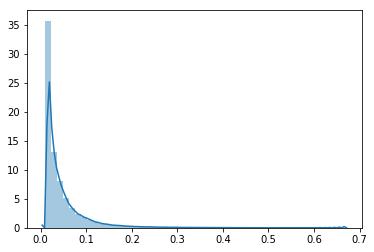

In [15]:
with h5py.File('ready-to-float/wavelet_multicl_5.h5','r') as df:
    copa = df['train/images'][:145]
#plt.imshow(copa[...,1])
#plt.colorbar()
copa = copa.ravel()
sns.distplot(copa[copa>0.01])

In [20]:
(copa<0.2).sum()/copa.shape[0]

0.9973888888888889

In [3]:
585*50/3600

8.125

In [33]:
copa = np.random.randn(1000,300,300)
zhopa = Parallel(n_jobs=3, verbose=1)(delayed(foo)(m) for m in copa)
len(zhopa)

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 158 tasks      | elapsed:    2.7s
[Parallel(n_jobs=3)]: Done 758 tasks      | elapsed:   12.6s
[Parallel(n_jobs=3)]: Done 1000 out of 1000 | elapsed:   16.5s finished


1000

In [34]:
np.unique([zh[1] for zh in zhopa])

array([20608, 20609, 20618])

In [19]:
copa = np.random.randn(1000,300,300)
zhopa = Parallel(n_jobs=5, verbose=1)(delayed(foo)(m) for m in copa)
len(zhopa)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    2.1s
[Parallel(n_jobs=5)]: Done 1000 out of 1000 | elapsed:   10.4s finished


1000

In [44]:
copa = np.random.randn(100,1700,1700)
zhopa = Parallel(n_jobs=6, verbose=10)(delayed(foo)(m) for m in copa)
len(zhopa)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    5.3s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:   15.0s
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:   20.1s
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:   25.1s
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   34.7s
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed:   43.9s
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:   48.8s
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:  1.3min finished


100

In [32]:
np.unique([zh[1] for zh in zhopa])

array([20607, 20608, 20609, 20617, 20618, 20624])

In [8]:
copa = np.random.randn(1000,300,300)
zhopa = Parallel(n_jobs=7, verbose=1)(delayed(foo)(m) for m in copa)
len(zhopa)

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done 146 tasks      | elapsed:    1.4s
[Parallel(n_jobs=7)]: Done 1000 out of 1000 | elapsed:    8.5s finished


1000

In [9]:
copa = np.random.randn(1000,300,300)
zhopa = Parallel(n_jobs=10, verbose=1)(delayed(foo)(m) for m in copa)
len(zhopa)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  80 tasks      | elapsed:    0.9s
[Parallel(n_jobs=10)]: Done 1000 out of 1000 | elapsed:    8.2s finished


1000

In [3]:
copa = np.random.randn(1000,300,300)
zhopa = Parallel(n_jobs=1, verbose=1)(delayed(foo)(m) for m in copa)
len(zhopa)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   42.3s finished


1000

In [45]:
del copa,zhopa
gc.collect()

1710

In [3]:
from IPython.utils.capture import capture_output

In [13]:
print('hello')
with capture_output(display=False) as caput:
    print('zhopa bobra')
    copa = np.random.randn(1000,300,300)
    zhopa = Parallel(n_jobs=6, verbose=1)(delayed(foo)(m) for m in copa)
    print(len(zhopa))
print('artem')

hello
artem


In [14]:
caput.show()

zhopa bobra
1000


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 168 tasks      | elapsed:    1.6s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    8.6s finished


In [16]:
os.getpid()

20490

In [3]:
def root2hdf5(pol_ids=None, part_i=0, path=None, name=None, name_dict=None, dr=16, n_pol=8, return_pols=True):
    with capture_output() as caput:
        ims, pols = load_root_images(pol_ids, path+name+'/dm_tracks_cl.dm.root', dr=dr, n_pol=n_pol, return_pols=return_pols)
    with h5py.File('data_raw_root_ims_9pol.h5','a') as dfile:
        dfile.create_dataset(name_dict[name]+'/part'+str(part_i)+'/images', data=ims)
        dfile.create_dataset(name_dict[name]+'/part'+str(part_i)+'/pol_ids', data=pols)
    del ims, pols, caput; gc.collect();

In [24]:
n_pols = 9
path_dir = '/mnt/ML-drive/Artem/70nm/Oct2019_N123gf/'
class_names_ft = ['Carbon/100keV/0degr','Carbon/100keV/45degr','Carbon/100keV/90degr','Carbon/100keV/test', 'gamma']
id_header = ['HeaderID','ViewID','GrainID','pol0','pol1','pol2','pol3','pol4','pol5','pol6','pol7','tr_flag','n_pol']

name_dict={name:name for name in class_names_ft}

In [ ]:
part_size=500

start = datetime.now()
for name in class_names_ft:
    params = dict(path=path_dir, name=name, name_dict=name_dict, dr=40, n_pol=8, return_pols=True)
    fold = datetime.now()
    print(name_dict[name])
    pol_ids = pd.read_csv(path_dir+name+'/imcheck_bfcl.txt', header=None, names=id_header)
    pol_ids = pol_ids.sort_values(by=['HeaderID','GrainID'])
    num_parts = pol_ids.shape[0]//part_size+1
    pol_parts = [pol_ids[i*part_size:(i+1)*part_size] for i in range(num_parts)]
    print('\tloading ',num_parts,' parts of ',part_size,' imgs')
    Parallel(n_jobs=6, verbose=10)(delayed(root2hdf5)(pols, i_part, **params) for i_part,pols in enumerate(pol_parts))
    print('\n\nloaded in ',datetime.now()-fold,'\n')
    gc.collect();
print('total loading time:',datetime.now()-start)

Carbon/100keV/0degr
	loading  93  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:  3.8min
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:  4.1min
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed: 12.0min
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed: 16.1min
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed: 20.5min
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 28.2min
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed: 35.9min
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed: 40.9min
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed: 52.3min
[Parallel(n_jobs=6)]: Done  93 out of  93 | elapsed: 64.2min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.




loaded in  1:04:09.338666 

Carbon/100keV/45degr
	loading  119  parts of  500  imgs


[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:  3.8min
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed: 12.0min
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed: 16.1min
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed: 20.4min
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 28.4min
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed: 36.3min
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed: 41.5min
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed: 52.7min
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed: 61.0min
[Parallel(n_jobs=6)]: Done 101 tasks      | elapsed: 69.7min
[Parallel(n_jobs=6)]: Done 119 out of 119 | elapsed: 81.8min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.




loaded in  1:21:46.464195 

Carbon/100keV/90degr
	loading  119  parts of  500  imgs


[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:  3.9min
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:  4.3min
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed: 12.2min
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed: 16.4min
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed: 20.9min
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 28.8min
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed: 37.0min
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed: 42.1min
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed: 53.8min
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed: 62.2min
[Parallel(n_jobs=6)]: Done 101 tasks      | elapsed: 71.1min
[Parallel(n_jobs=6)]: Done 119 out of 119 | elapsed: 83.3min finished




loaded in  1:23:20.565194 

Carbon/100keV/test
	loading  145  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:  4.3min
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed: 12.5min
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed: 16.7min
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed: 21.3min
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 29.1min
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed: 37.4min
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed: 43.0min
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed: 54.6min
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed: 63.1min
[Parallel(n_jobs=6)]: Done 101 tasks      | elapsed: 72.5min
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed: 84.0min
[Parallel(n_jobs=6)]: Done 133 tasks      | elapsed: 96.7min
[Parallel(n_jobs=6)]: Done 145 out of 145 | elapsed: 102.8min finished




loaded in  1:42:49.713896 

gamma
	loading  674  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed: 10.3min
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed: 11.1min
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed: 30.8min
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed: 41.6min
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed: 52.8min
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 72.5min
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed: 91.8min
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed: 105.1min
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed: 132.6min
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed: 155.3min
[Parallel(n_jobs=6)]: Done 101 tasks      | elapsed: 177.5min
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed: 206.8min
[Parallel(n_jobs=6)]: Done 133 tasks      | elapsed: 234.6min
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed: 263.2min
[Parallel(n_jobs=6)]: Done 169 tasks      | elapsed: 295.9min
[P

In [8]:
part_size=500

start = datetime.now()
for name in class_names_ft:
    params = dict(path=path_dir, name=name, name_dict=name_dict, dr=40, n_pol=8, return_pols=True)
    fold = datetime.now()
    print(name_dict[name])
    pol_ids = pd.read_csv(path_dir+name+'/imcheck_bfcl.txt', header=None, names=id_header)
    pol_ids = pol_ids.sort_values(by=['HeaderID','GrainID'])
    num_parts = pol_ids.shape[0]//part_size+1
    pol_parts = [pol_ids[i*part_size:(i+1)*part_size] for i in range(num_parts)]
    print('\tloading ',num_parts,' parts of ',part_size,' imgs')
    Parallel(n_jobs=6, verbose=10)(delayed(root2hdf5)(pols, i_part, **params) for i_part,pols in enumerate(pol_parts))
    print('\n\nloaded in ',datetime.now()-fold,'\n')
    gc.collect();
print('total loading time:',datetime.now()-start)

gamma
	loading  674  parts of  500  imgs


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed: 10.1min
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed: 10.8min
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed: 29.7min
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed: 39.5min
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed: 50.0min
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 68.9min
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed: 88.0min
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed: 99.9min
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed: 127.5min
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed: 148.0min
[Parallel(n_jobs=6)]: Done 101 tasks      | elapsed: 168.1min
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed: 197.1min
[Parallel(n_jobs=6)]: Done 133 tasks      | elapsed: 225.4min
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed: 248.6min
[Parallel(n_jobs=6)]: Done 169 tasks      | elapsed: 284.4min
[Pa



loaded in  18:40:43.060090 

total loading time: 18:40:43.149682


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm
Error in <TCling::RegisterModule>: cannot find dictionary module DMRootCint_rdict.pcm


In [3]:
def shift_scale(imgs, remove_mode=True, scale=True, reject_peak=1.0, reject_bright=0.02, bright_thr=20):
    imgs = imgs.astype(np.float32) if scale else imgs.astype(np.int16)
    moda, meda = None, None
    drop_list = []
    if remove_mode:
        moda = np.zeros((imgs.shape[0],imgs.shape[-1]),dtype=np.int16)
        meda = np.zeros((imgs.shape[0],imgs.shape[-1]),dtype=np.int16)
        for i,im in enumerate(imgs):
            for j,pol_im in enumerate(im.T):
                if pol_im.any():
                    if (pol_im>256*reject_peak).any() and not i in drop_list: drop_list.append(i)
                    moda[i,j] = sp.stats.mode(pol_im, axis=None)[0]
                    meda[i,j] = np.median(pol_im)
                    imgs[i,...,j] -= moda[i,j]
        thr = min(np.quantile(meda, 1-reject_bright), bright_thr)
        for i,med in enumerate(meda):
            if (med>thr).any() and not i in drop_list: drop_list.append(i)
    if scale: imgs /= 256*reject_peak
    mask = np.ones(imgs.shape[0],dtype=bool)
    if drop_list: mask[drop_list]=False
    return imgs[mask], moda, meda, mask

In [3]:
angles = ['0degr','45degr','90degr']
name = 'Carbon/100keV'

data_size = 0
with h5py.File('data_raw_root_ims_9pol_80.h5','r') as df:
    for ang in angles:
        for p in df[name+'/'+ang].keys():
            data_size += df[name+'/'+ang+'/'+p+'/images'].shape[0]
            im_shp = df[name+'/'+ang+'/'+p+'/images'].shape[1:]
            pol_shp = df[name+'/'+ang+'/'+p+'/pol_ids'].shape[1]

imgs = np.zeros((data_size, 40, 40, 9), dtype=np.float32)
pol_ids = np.ones((data_size, pol_shp), dtype=np.int32)
big_mask = np.ones(0, dtype=bool)
            
with h5py.File('data_raw_root_ims_9pol_80.h5','r') as df:
    n_ims_w = 0
    for ang in angles:
        print('Loading angle:', ang)
        for p in tqdm(df[name+'/'+ang].keys(), desc='parts'):
            tmp_ims, _,_, tmp_mask = shift_scale(df[name+'/'+ang+'/'+p+'/images'][...], reject_peak=0.5, reject_bright=0.02, bright_thr=20)
            tmp_pols = df[name+'/'+ang+'/'+p+'/pol_ids'][...]; tmp_pols = tmp_pols[tmp_mask]
            imgs[n_ims_w:n_ims_w+tmp_ims.shape[0]] = np.copy(tmp_ims[:,20:60,20:60,:])
            pol_ids[n_ims_w:n_ims_w+tmp_ims.shape[0]] = np.copy(tmp_pols)
            n_ims_w += tmp_ims.shape[0]
            big_mask = np.append(big_mask, tmp_mask)
            gc.collect();
print(n_ims_w)

parts:   0%|          | 0/93 [00:00<?, ?it/s]

Loading angle: 0degr


parts:   0%|          | 0/119 [00:00<?, ?it/s]

Loading angle: 45degr


parts:   0%|          | 0/119 [00:00<?, ?it/s]

Loading angle: 90degr


parts: 100%|██████████| 119/119 [04:18<00:00,  2.23s/it]

150911


In [6]:
with h5py.File('data_ims_scaled_9pol_40.h5','a') as df:
    df.create_dataset('Carbon/100keV/images', data=imgs[:n_ims_w])
    df.create_dataset('Carbon/100keV/pol_ids', data=pol_ids[:n_ims_w])

In [7]:
del imgs, pol_ids, tmp_ims, tmp_pols
gc.collect();

In [9]:
with h5py.File('data_raw_root_ims_9pol_80.h5','r') as df:
    print(df['Carbon'].keys())

<KeysViewHDF5 ['100keV']>


In [10]:
#angles = ['0degr','45degr','90degr']
name = 'gamma'

data_size = 0
with h5py.File('data_raw_root_ims_9pol_80.h5','r') as df:
    for p in df[name].keys():
        data_size += df[name+'/'+p+'/images'].shape[0]
        im_shp = df[name+'/'+p+'/images'].shape[1:]
        pol_shp = df[name+'/'+p+'/pol_ids'].shape[1]

imgs = np.zeros((data_size, 40, 40, 9), dtype=np.float32)
pol_ids = np.ones((data_size, pol_shp), dtype=np.int32)
big_mask = np.ones(0, dtype=bool)
            
with h5py.File('data_raw_root_ims_9pol_80.h5','r') as df:
    n_ims_w = 0
    print('Loading :', name)
    for p in tqdm(df[name].keys(), desc='parts'):
        tmp_ims, _,_, tmp_mask = shift_scale(df[name+'/'+p+'/images'][...], reject_peak=0.5, reject_bright=0.02, bright_thr=20)
        tmp_pols = df[name+'/'+p+'/pol_ids'][...]; tmp_pols = tmp_pols[tmp_mask]
        imgs[n_ims_w:n_ims_w+tmp_ims.shape[0]] = np.copy(tmp_ims[:,20:60,20:60,:])
        pol_ids[n_ims_w:n_ims_w+tmp_ims.shape[0]] = np.copy(tmp_pols)
        n_ims_w += tmp_ims.shape[0]
        big_mask = np.append(big_mask, tmp_mask)
        gc.collect();
print(n_ims_w)

parts:   0%|          | 0/367 [00:00<?, ?it/s]

Loading : gamma


parts: 100%|██████████| 367/367 [14:18<00:00,  2.35s/it]

168138


In [11]:
with h5py.File('data_ims_scaled_9pol_40.h5','a') as df:
    df.create_dataset(name+'/images', data=imgs[:n_ims_w])
    df.create_dataset(name+'/pol_ids', data=pol_ids[:n_ims_w])

In [12]:
del imgs, pol_ids, tmp_ims, tmp_pols
gc.collect();

In [35]:
import sys
sys.getsizeof(imgs)/1024**3

8.218985930085182

In [25]:
name = class_names_ft[0]
pol_ids = pd.read_csv(path_dir+name+'/imcheck_bfcl.txt', header=None, names=id_header)
pol_ids.shape

(46024, 13)

In [32]:
cntr = 0
with h5py.File('data_raw_root_ims_9pol_old.h5','r') as df:
    for p in df[name].keys():
        cntr += df[name+'/'+p+'/pol_ids'].shape[0]
print(cntr)

45779


In [34]:
(2200*1600)/(2300*1700)

0.9002557544757033

In [35]:
(2250*1650)/(2300*1700)

0.9494884910485933

(468, 80, 80, 9)
ModeResult(mode=array([14], dtype=uint8), count=array([11549537]))


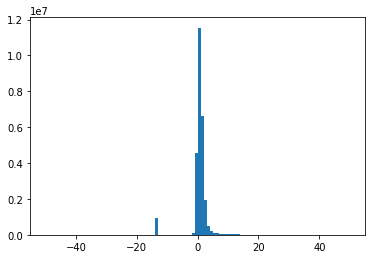

In [3]:
import scipy as sp
with h5py.File('data_raw_root_ims_9pol_80.h5','r') as df:
    copa = df['gamma/part87/images'][...]
    print(copa.shape)
    print(sp.stats.mode(copa, axis=None))
    plt.hist((copa.astype(np.int16)-sp.stats.mode(copa, axis=None)[0]).ravel(), range=(-50,50), bins=100)

(461, 80, 80, 9)
ModeResult(mode=array([16], dtype=uint8), count=array([10177715]))


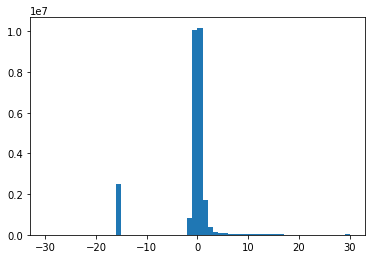

In [4]:
import scipy as sp
with h5py.File('data_raw_root_ims_9pol_80.h5','r') as df:
    copa = df['Carbon/100keV/0degr/part36/images'][...]
    print(copa.shape)
    print(sp.stats.mode(copa, axis=None))
    plt.hist((copa.astype(np.int16)-sp.stats.mode(copa, axis=None)[0]).ravel(), range=(-30,30), bins=60)

In [4]:
def shift_scale(imgs, remove_mode=True, scale=True, denoise=False, wavelet='sym3'):
    imgs = imgs.astype(np.float32) if scale else imgs.astype(np.int16)
    if remove_mode:
        moda = sp.stats.mode(imgs, axis=None)[0]
        mask = np.ones((imgs.shape[0],1,1,imgs.shape[-1]),dtype=int)
        for i,im in enumerate(imgs):
            for j,pol_im in enumerate(im.T):
                mask[i,0,0,j] = pol_im.any()
        imgs -= mask*moda
    if scale: imgs /= np.max(imgs)
    return imgs

In [4]:
def shift_scale_(imgs, remove_mode=True, scale=True, reject_peak=1.0, reject_bright=0.02, bright_thr=20):
    imgs = imgs.astype(np.float32) if scale else imgs.astype(np.int16)
    moda, meda = None, None
    drop_list = []
    if remove_mode:
        moda = np.zeros((imgs.shape[0],imgs.shape[-1]),dtype=np.int16)
        meda = np.zeros((imgs.shape[0],imgs.shape[-1]),dtype=np.int16)
        for i,im in enumerate(imgs):
            for j,pol_im in enumerate(im.T):
                if pol_im.any():
                    if (pol_im>256*reject_peak).any() and not i in drop_list: drop_list.append(i)
                    moda[i,j] = sp.stats.mode(pol_im, axis=None)[0]
                    meda[i,j] = np.median(pol_im)
                    imgs[i,...,j] -= moda[i,j]
#                     if meda[i,j]>18:
#                         print(i,j,'\t',meda[i,j])
#                         plt.imshow(pol_im)
#                         plt.show()
#                         if not i in drop_list: drop_list.append(i)
#                     if (pol_im>128).any():
#                         print('\n max peak',pol_im.max())
#                         print(i,j,'\t',meda[i,j])
#                         plt.imshow(pol_im)
#                         plt.show()
#                         if not i in drop_list: drop_list.append(i)
        thr = min(np.quantile(meda, 1-reject_bright), bright_thr)
#        print(thr)
        for i,med in enumerate(meda):
            if (med>thr).any() and not i in drop_list: drop_list.append(i)
    if scale: imgs /= 256*reject_peak
    mask = np.ones(imgs.shape[0],dtype=bool)
    if drop_list: mask[drop_list]=False
    return imgs[mask], moda, meda, mask

In [5]:
#%%timeit
sp.stats.mode(copa, axis=None)

ModeResult(mode=array([14], dtype=uint8), count=array([11549537]))

In [6]:
#%%timeit
np.median(copa)

14.0

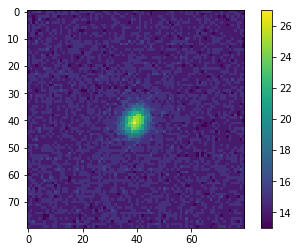

In [7]:
plt.imshow(copa[88,...,1])
plt.colorbar()

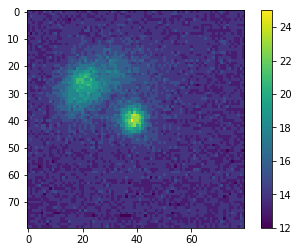

In [8]:
plt.imshow(copa[361,...,1])
plt.colorbar()

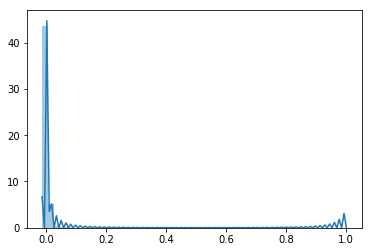

In [8]:
#%%timeit
zhopa = shift_scale(copa, scale=True)
sns.distplot(zhopa.ravel())

In [9]:
zhopa.min()

-0.012448133

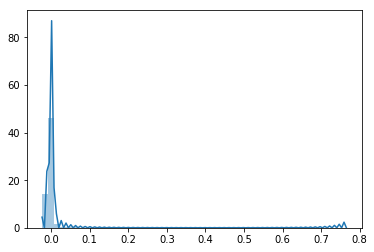

In [9]:
#%%timeit
zhopa_, mopa, mepa, mask = shift_scale_(copa, reject_peak=0.5, reject_bright=0.02, bright_thr=20)
drop_list = [i for i,m in enumerate(mask) if not m]
sns.distplot(zhopa_.ravel())

In [10]:
print(len(drop_list))
print(drop_list)

7
[134, 146, 162, 163, 192, 203, 402]


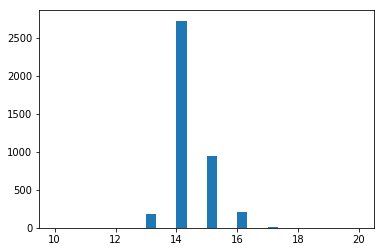

In [11]:
plt.hist(mopa.ravel(), range=(10,20), bins=30);

In [12]:
np.unique(mopa, return_counts=True)

(array([ 0, 13, 14, 15, 16, 17], dtype=int16),
 array([ 144,  181, 2722,  946,  210,    9]))

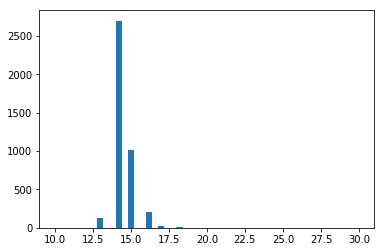

In [13]:
plt.hist(mepa.ravel(), range=(10,30), bins=50);

In [14]:
np.unique(mepa, return_counts=True)

(array([ 0, 13, 14, 15, 16, 17, 18, 23], dtype=int16),
 array([ 144,  123, 2696, 1011,  202,   26,    9,    1]))

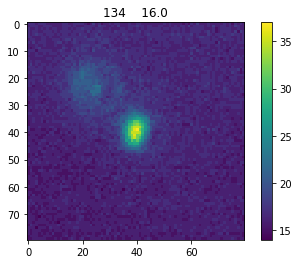

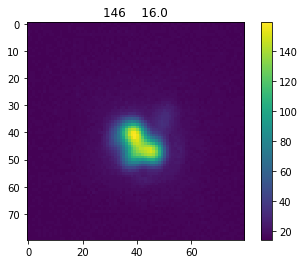

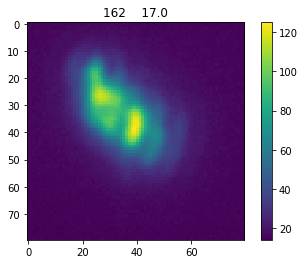

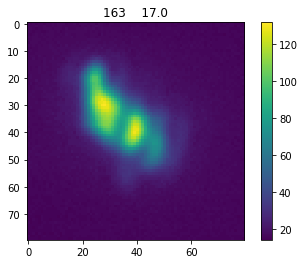

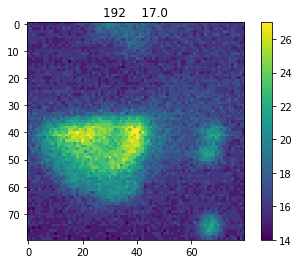

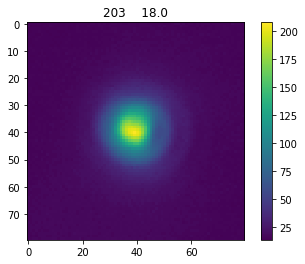

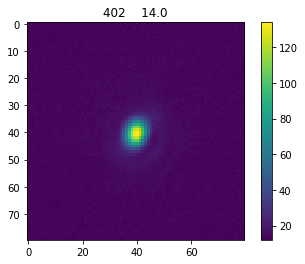

In [15]:
for i in drop_list:
    j=0
    while(not copa[i,...,j].any()): j+=1
    plt.imshow(copa[i,...,j])
    plt.title(str(i)+'    '+str(np.median(copa[i,...,j])))
    plt.colorbar()
    plt.show()

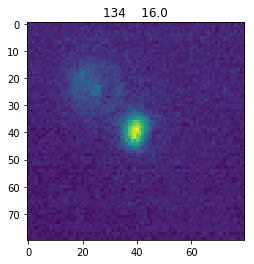

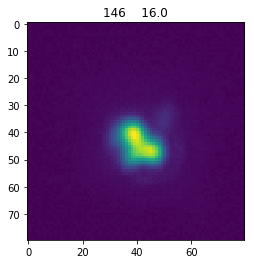

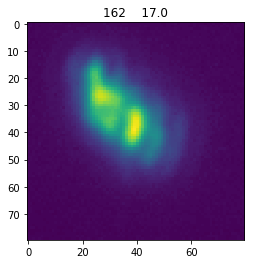

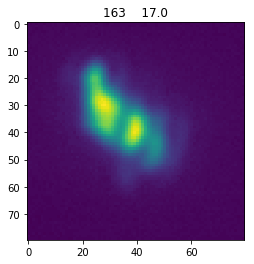

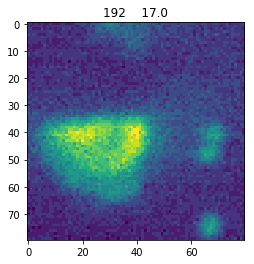

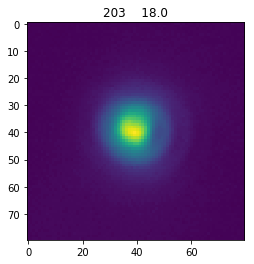

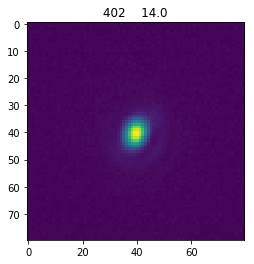

In [18]:
for i in drop_list:
    j=0
    while(not copa[i,...,j].any()): j+=1
    plt.imshow(copa[i,...,j])
    plt.title(str(i)+'    '+str(np.median(copa[i,...,j])))
    plt.show()

In [123]:
zhopa_.min()

-0.035897437

16.0

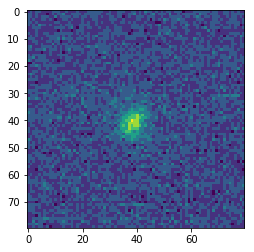

In [20]:
plt.imshow(copa[192,:,:,1])
np.median(copa[192,:,:])

In [19]:
%%timeit
zhopa = shift_scale(copa, scale=True)
#sns.distplot(zhopa.ravel())

1.02 s ± 12.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
%%timeit
zhopa_, mopa, mepa, mask = shift_scale_(copa, reject_peak=0.5, reject_bright=0.02, bright_thr=20)
#drop_list = [i for i,m in enumerate(mask) if not m]
#sns.distplot(zhopa_.ravel())

16.0
16.0
16.0
16.0
16.0
16.0
16.0
16.0
2.13 s ± 21.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


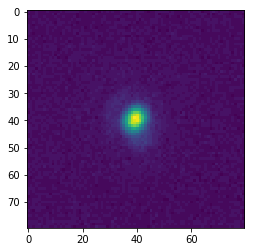

In [87]:
plt.imshow(zhopa_[226,...,1])

In [88]:
zhopa[226,...,1]

array([[ 0.00416667,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.00416667],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.00416667],
       [ 0.00416667,  0.        ,  0.00416667, ...,  0.00416667,
         0.00416667,  0.        ],
       ...,
       [ 0.00416667,  0.00416667,  0.00416667, ...,  0.00416667,
         0.        ,  0.00416667],
       [ 0.00416667,  0.00416667,  0.00416667, ...,  0.00416667,
         0.        ,  0.        ],
       [ 0.        ,  0.00416667,  0.        , ...,  0.00416667,
         0.        ,  0.        ]], dtype=float32)

In [19]:
import pywt
from skimage.restoration import denoise_wavelet
wavelet = pywt.Wavelet('sym3')
print(wavelet)

Wavelet sym3
  Family name:    Symlets
  Short name:     sym
  Filters length: 6
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       near symmetric
  DWT:            True
  CWT:            False


In [20]:
import pywt
from skimage.restoration import denoise_wavelet
wavelet = pywt.Wavelet('db3')
print(wavelet)

Wavelet db3
  Family name:    Daubechies
  Short name:     db
  Filters length: 6
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


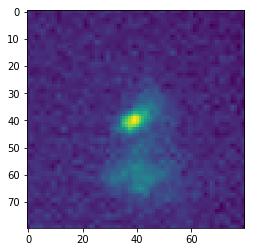

0.010182039

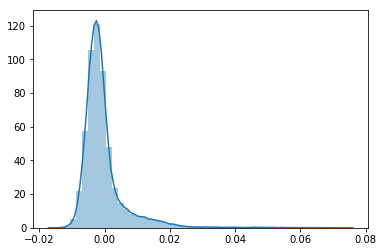

In [36]:
#%%timeit
dopa = denoise_wavelet(zhopa_[24],multichannel=True, wavelet='sym3')# - denoise_wavelet(zhopa_[189],multichannel=True, wavelet='sym3')#-zhopa_[189]
plt.imshow(dopa[...,2])
plt.show()
sns.distplot(dopa[...].ravel());
dopa[20:60,20:60].std()

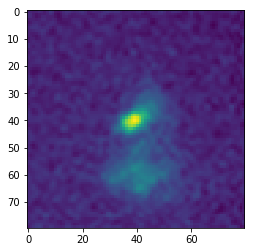

0.010112316

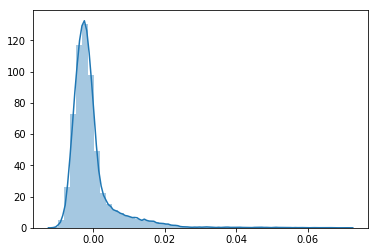

In [35]:
#%%timeit
from skimage.restoration import cycle_spin
denoise_kwargs = dict(multichannel=True, wavelet='sym3')#, rescale_sigma=True)
dopa = cycle_spin(zhopa_[24], func=denoise_wavelet, max_shifts=5, func_kw=denoise_kwargs, multichannel=True)
#dopa = denoise_wavelet(,multichannel=True, wavelet='sym3')# - denoise_wavelet(zhopa_[189],multichannel=True, wavelet='sym3')#-zhopa_[189]
plt.imshow(dopa[...,2])
plt.show()
sns.distplot(dopa[...].ravel());
dopa[20:60,20:60].std()

In [33]:
%%timeit
dopa = denoise_wavelet(zhopa_[24],multichannel=True, wavelet='sym3')# - denoise_wavelet(zhopa_[189],multichannel=True, wavelet='sym3')#-zhopa_[189]
#plt.imshow(dopa[...,2])
#plt.show()
#sns.distplot(dopa[...].ravel());
#dopa[20:60,20:60].std()

9.89 ms ± 14.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [34]:
%%timeit
#from skimage.restoration import cycle_spin
denoise_kwargs = dict(multichannel=True, wavelet='sym3')#, rescale_sigma=True)
dopa = cycle_spin(zhopa_[24], func=denoise_wavelet, max_shifts=5, func_kw=denoise_kwargs, multichannel=True)
#dopa = denoise_wavelet(,multichannel=True, wavelet='sym3')# - denoise_wavelet(zhopa_[189],multichannel=True, wavelet='sym3')#-zhopa_[189]
#plt.imshow(dopa[...,2])
#plt.show()
#sns.distplot(dopa[...].ravel());
#dopa[20:60,20:60].std()

1.37 s ± 68.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


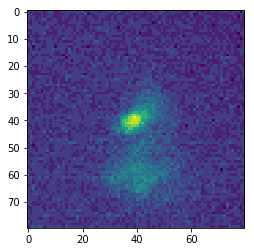

In [28]:
plt.imshow(zhopa_[24,...,2])

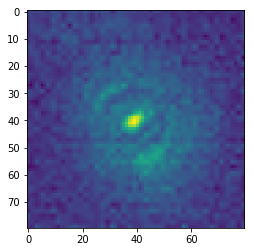

0.0038136067

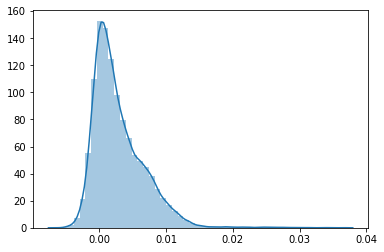

In [310]:
#%%timeit
dopa = denoise_wavelet(zhopa_[189],multichannel=True, wavelet='db3')# - denoise_wavelet(zhopa_[189],multichannel=True, wavelet='sym3')#-zhopa_[189]
plt.imshow(dopa[...,2])
plt.show()
sns.distplot(dopa[...].ravel());
dopa[20:60,20:60].std()

In [247]:
dopa = zhopa_[192]
np.unique(zhopa_[mask], return_counts=True)

(array([-0.01260504, -0.00840336, -0.00420168,  0.        ,  0.00420168,
         0.00840336,  0.01260504,  0.01680672,  0.0210084 ,  0.02521008,
         0.02941176,  0.03361345,  0.03781513,  0.04201681,  0.04621849,
         0.05042017,  0.05462185,  0.05882353,  0.06302521,  0.06722689,
         0.07142857,  0.07563026,  0.07983194,  0.08403362,  0.0882353 ,
         0.09243698,  0.09663866,  0.10084034,  0.10504202,  0.1092437 ,
         0.11344538,  0.11764706,  0.12184874,  0.12605043,  0.13025211,
         0.13445379,  0.13865547,  0.14285715,  0.14705883,  0.15126051,
         0.15546219,  0.15966387,  0.16386555,  0.16806723,  0.17226891,
         0.1764706 ,  0.18067227,  0.18487395,  0.18907563,  0.19327731,
         0.197479  ,  0.20168068,  0.20588236,  0.21008404,  0.21428572,
         0.2184874 ,  0.22268908,  0.22689076,  0.23109244,  0.23529412,
         0.2394958 ,  0.24369748,  0.24789916,  0.25210086,  0.25630254,
         0.26050422,  0.2647059 ,  0.26890758,  0.2

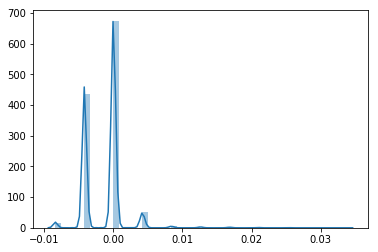

In [250]:
sns.distplot(dopa.ravel());

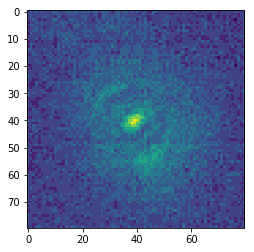

In [281]:
plt.imshow(zhopa_[189,...,2])

In [110]:
%%timeit
dopa = denoise_wavelet(zhopa[192],multichannel=True, wavelet='db1')# - denoise_wavelet(zhopa[226],multichannel=True, wavelet='sym3')

16 ms ± 80.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [105]:
%%timeit
dopa = denoise_wavelet(zhopa[192],multichannel=True, wavelet='sym6')# - denoise_wavelet(zhopa[226],multichannel=True, wavelet='sym3')

11.1 ms ± 28.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [129]:
sp.stats.mode(zhopa[87], axis=None)

ModeResult(mode=array([0.00414938], dtype=float32), count=array([4072]))

In [32]:
np.array([1,2,3],dtype=np.uint8)-5

array([252, 253, 254], dtype=uint8)

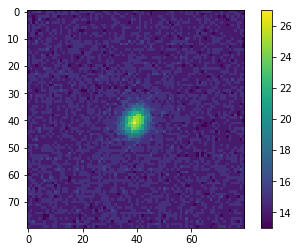

In [7]:
plt.imshow(copa[88,...,1])
plt.colorbar()

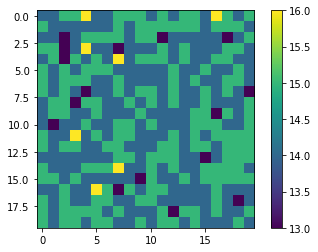

In [16]:
plt.imshow(copa[88,:20,:20,1])
plt.colorbar()

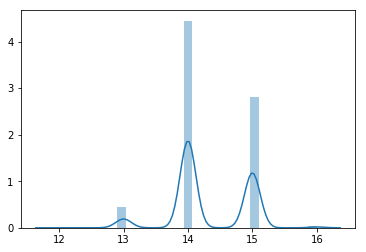

In [19]:
sns.distplot(copa[88,:20,:20].ravel())

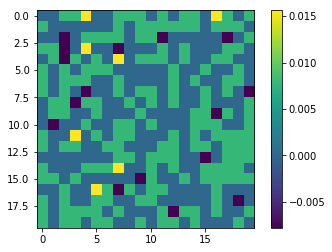

In [18]:
plt.imshow(zhopa_[88,:20,:20,1])
plt.colorbar()

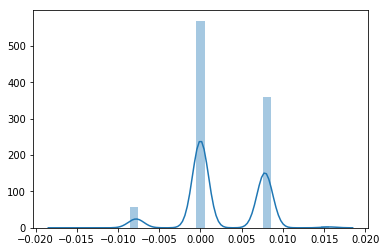

In [20]:
sns.distplot(zhopa_[88,:20,:20].ravel())

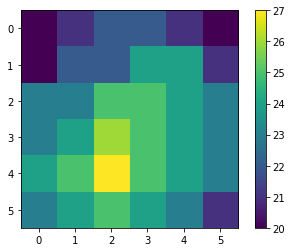

In [25]:
plt.imshow(copa[88,37:43,37:43,1])
plt.colorbar()

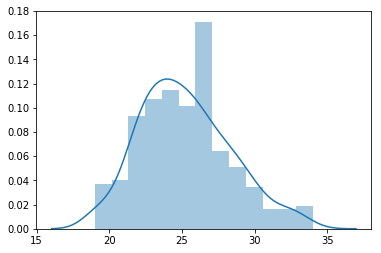

In [26]:
sns.distplot(copa[88,37:43,37:43].ravel())

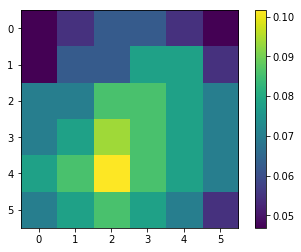

In [27]:
plt.imshow(zhopa_[88,37:43,37:43,1])
plt.colorbar()

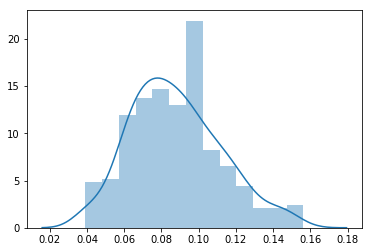

In [28]:
sns.distplot(zhopa_[88,37:43,37:43].ravel())

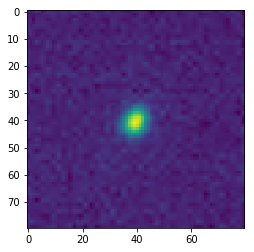

0.015863456

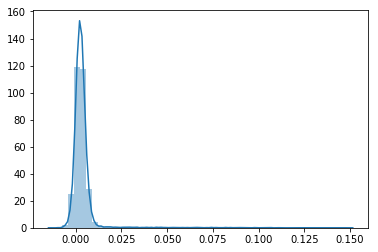

In [30]:
#%%timeit
from skimage.restoration import denoise_wavelet
dopa = denoise_wavelet(zhopa_[88],multichannel=True, wavelet='sym3')# - denoise_wavelet(zhopa_[189],multichannel=True, wavelet='sym3')#-zhopa_[189]
plt.imshow(dopa[...,1])
plt.show()
sns.distplot(dopa[...].ravel());
dopa[20:60,20:60].std()

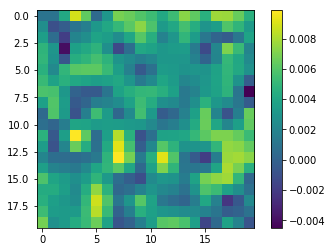

In [32]:
plt.imshow(dopa[:20,:20,1])
plt.colorbar()

0.0023814938


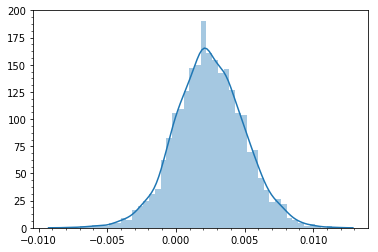

In [39]:
sns.distplot(dopa[:20,:20].ravel())
plt.minorticks_on()
print(np.median(dopa[:20,:20]))

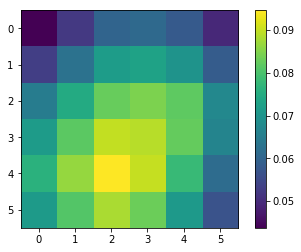

In [34]:
plt.imshow(dopa[37:43,37:43,1])
plt.colorbar()

0.08466558


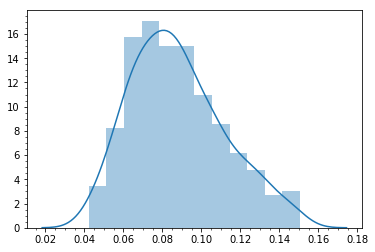

In [40]:
sns.distplot(dopa[37:43,37:43].ravel())
plt.minorticks_on()
print(np.median(dopa[37:43,37:43]))

In [76]:
with h5py.File('data_raw_root_ims_9pol_80.h5','r') as df:
    print(df['Carbon/60keV/test/part80'].keys())
    copa = np.copy(df['Carbon/60keV/test/part80/images'])
    
with h5py.File('ready-to-float/multicl_5.h5','r') as df:
    print(df['train'].keys())
    sopa = np.copy(df['train/images'][:5000])
with h5py.File('ready-to-float/wavelet_multicl_5.h5','r') as df:
    dopa = np.copy(df['train/images'][:5000])

<KeysViewHDF5 ['images', 'pol_ids']>
<KeysViewHDF5 ['images', 'labels']>


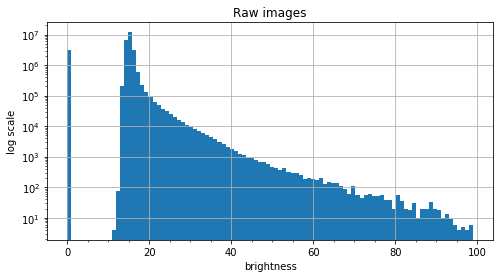

In [31]:
plt.figure(figsize=(8,4))
plt.hist(copa[copa<100].ravel(), bins=100)
plt.minorticks_on()
plt.grid()
plt.yscale('log')
plt.xlabel('brightness')
plt.ylabel('log scale')
plt.title('Raw images');

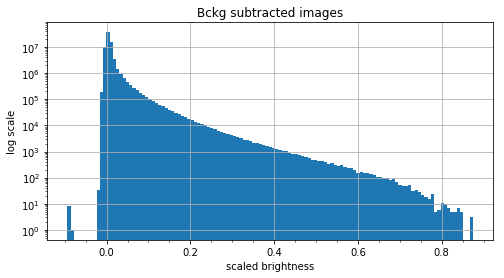

In [45]:
plt.figure(figsize=(8,4))
plt.hist(sopa.ravel(), bins=125)
plt.minorticks_on()
plt.grid()
plt.yscale('log')
plt.xlabel('scaled brightness')
plt.ylabel('log scale')
plt.title('Bckg subtracted images');

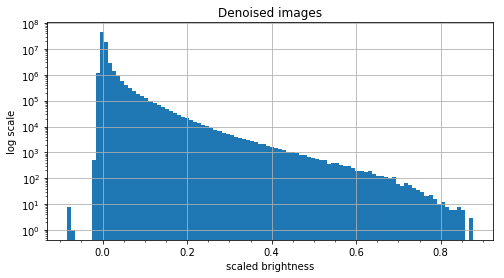

In [33]:
plt.figure(figsize=(8,4))
plt.hist(dopa.ravel(), bins=100)
plt.minorticks_on()
plt.grid()
plt.yscale('log')
plt.xlabel('scaled brightness')
plt.ylabel('log scale')
plt.title('Denoised images');

In [77]:
sopa, _, _, mask = shift_scale(copa, reject_peak=0.5, reject_bright=0.02, bright_thr=20)
copa = copa[mask]
sopa = sopa[:,20:60,20:60,:]

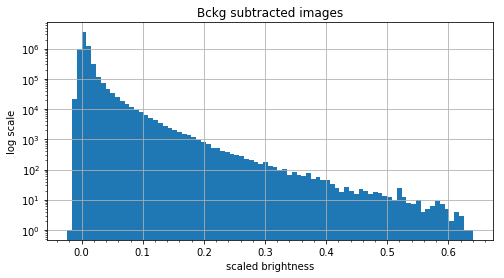

In [78]:
plt.figure(figsize=(8,4))
plt.hist(sopa.ravel(), bins=85)
plt.minorticks_on()
plt.grid()
plt.yscale('log')
plt.xlabel('scaled brightness')
plt.ylabel('log scale')
plt.title('Bckg subtracted images');

In [79]:
mask = np.ones(copa.shape[0], dtype=bool)
for i, im in enumerate(copa):
    if not im.all(): mask[i] = False
print(len(mask), mask.sum())

450 290


In [80]:
from skimage.restoration import denoise_wavelet
dopa = np.zeros_like(sopa[mask])
for i, so in enumerate(sopa[mask]):
    dopa[i] = denoise_wavelet(so, multichannel=True, wavelet='sym3')

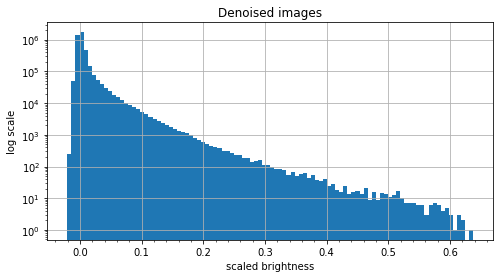

In [81]:
plt.figure(figsize=(8,4))
plt.hist(dopa.ravel(), bins=100)
plt.minorticks_on()
plt.grid()
plt.yscale('log')
plt.xlabel('scaled brightness')
plt.ylabel('log scale')
plt.title('Denoised images');

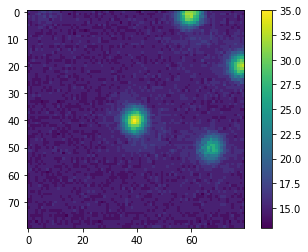

In [109]:
plt.imshow(copa[149,...,1])
plt.colorbar()

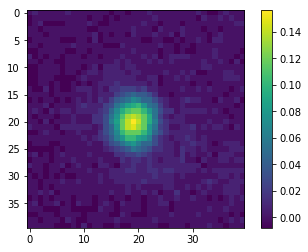

In [119]:
plt.imshow(sopa[149,...,1])
plt.colorbar()

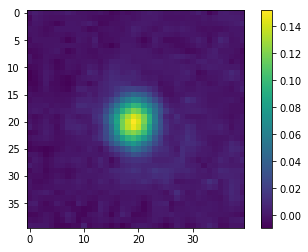

In [143]:
plt.imshow(dopa[107,...,1])
plt.colorbar()

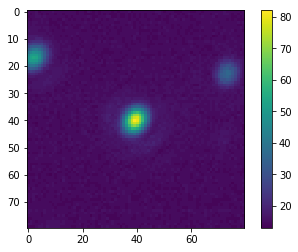

In [103]:
plt.imshow(copa[189,...,1])
plt.colorbar()

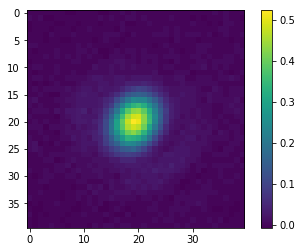

In [104]:
plt.imshow(sopa[189,...,1])
plt.colorbar()

In [106]:
mask[:189].sum()

141

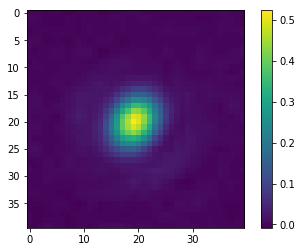

In [107]:
plt.imshow(dopa[141,...,1])
plt.colorbar()

In [4]:
plt.figure(figsize=(6,2))
plt.hist(copa[:,:20,:20].ravel());
print(np.median(copa[:,:20,:20]))

NameError: name 'copa' is not defined

<Figure size 432x144 with 0 Axes>

25.0


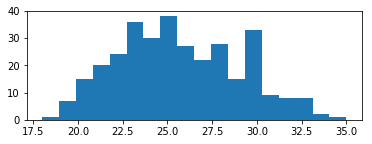

In [145]:
plt.figure(figsize=(6,2))
plt.hist(copa[149,37:43,37:43].ravel(), bins=18);
print(np.median(copa[149,37:43,37:43]))

0.0


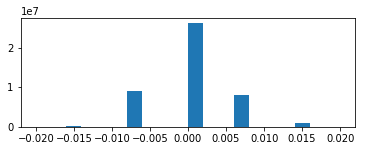

In [7]:
plt.figure(figsize=(6,2))
plt.hist(sopa[:,:10,:10].ravel(), range=(-0.02,0.02), bins=20);
print(np.median(sopa[:,:10,:10]))

In [ ]:
# mask = np.zeros(sopa.shape[0], dtype=bool)
# for i, so in enumerate(sopa):
    

0.0546875


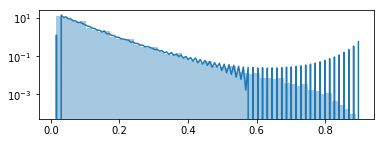

In [11]:
plt.figure(figsize=(6,2))
sns.distplot((sopa[:,17:23,17:23])[sopa[:,17:23,17:23]>0.01].ravel());
plt.yscale('log')
print(np.median(sopa[:,17:23,17:23]))

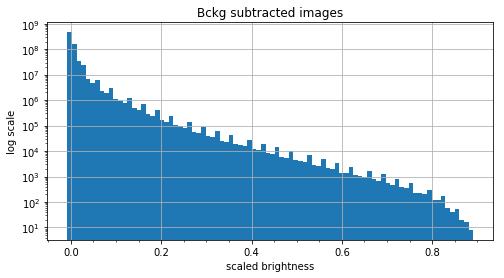

In [14]:
plt.figure(figsize=(8,4))
plt.hist(sopa[sopa>-0.015].ravel(), bins=88)
plt.minorticks_on()
plt.grid()
plt.yscale('log')
plt.xlabel('scaled brightness')
plt.ylabel('log scale')
plt.title('Bckg subtracted images');

In [129]:
mask[:149].sum()

107

-0.0014517119


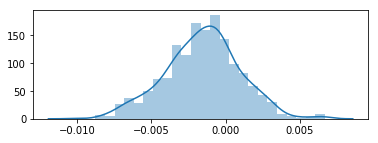

In [148]:
plt.figure(figsize=(6,2))
sns.distplot(dopa[107,:10,:10].ravel());
print(np.median(dopa[107,:10,:10]))

0.08072849


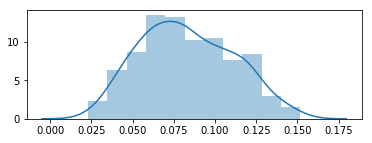

In [149]:
plt.figure(figsize=(6,2))
sns.distplot(dopa[107,17:23,17:23].ravel());
print(np.median(dopa[107,17:23,17:23]))

In [150]:
25/15

1.6666666666666667

In [18]:
with h5py.File('bckp_data_raw_root_ims_9pol_80.h5','r') as df:
    print(df['fog/Scan5'].keys())

<KeysViewHDF5 ['part0', 'part1', 'part10', 'part11', 'part12', 'part13', 'part14', 'part15', 'part16', 'part17', 'part18', 'part19', 'part2', 'part20', 'part21', 'part22', 'part23', 'part24', 'part25', 'part26', 'part27', 'part28', 'part29', 'part3', 'part30', 'part31', 'part32', 'part33', 'part34', 'part35', 'part36', 'part37', 'part38', 'part39', 'part4', 'part40', 'part41', 'part42', 'part43', 'part44', 'part45', 'part46', 'part5', 'part6', 'part7', 'part8', 'part9']>


In [3]:
copa = np.zeros((0,80,80,9))
with h5py.File('bckp_data_raw_root_ims_9pol_80.h5','r') as df:
    for k in df['Carbon'].keys():
        for p in range(5):
            copa = np.vstack((copa, np.copy(df['Carbon/'+k+'/45degr/part'+str(p)+'/images'])))
    for g in ['gamma','fog/Scan5']:
        for p in range(5):
            copa = np.vstack((copa, np.copy(df[g+'/part'+str(p)+'/images'])))
print(copa.shape)
#     print(df['Carbon/60keV/test/part80'].keys())
#     copa = np.copy(df['Carbon/60keV/test/part80/images'])

# with h5py.File('ready-to-float/multicl_5.h5','r') as df:
#     print(df['train'].keys())
#     sopa = np.copy(df['train/images'][:50000])
# with h5py.File('ready-to-float/wavelet_multicl_5.h5','r') as df:
#     dopa = np.copy(df['train/images'][:50000])

(11554, 80, 80, 9)


In [4]:
%whos

Variable           Type            Data/Info
--------------------------------------------
Parallel           type            <class 'sklearn.externals<...>oblib.parallel.Parallel'>
ROOT               ModuleFacade    <module 'ROOT' from '/hom<...>ner-ml/ROOT/lib/ROOT.py'>
bad_inds           function        <function bad_inds at 0x7f40b7ec38c8>
capture_output     type            <class 'IPython.utils.capture.capture_output'>
copa               ndarray         11554x80x80x9: 665510400 elems, type `float64`, 5324083200 bytes (5077.44140625 Mb)
datetime           type            <class 'datetime.datetime'>
delayed            function        <function delayed at 0x7f40bac46488>
df                 File            <Closed HDF5 file>
foo                function        <function foo at 0x7f40b7ec3a60>
g                  str             fog/Scan5
gc                 module          <module 'gc' (built-in)>
get_pol_feat       function        <function get_pol_feat at 0x7f40b7ec3840>
h5py           

# playing with pixel histograms

In [10]:
with h5py.File('data_raw_root_ims_9pol_80.h5', 'r') as df:
#     print(df['fog/Scan5/part5'].keys())
    copa = df['Carbon/100keV/0degr/part11/images'][...]
    fopa = df['fog/Scan5/part5/images'][...]
    print(copa.shape, fopa.shape)

(425, 80, 80, 9) (415, 80, 80, 9)


In [27]:
np.quantile(medi_copa.ravel(), 0.98)

17.0

c100
0.95 quant: 16.0
0.98 quant: 17.0
0.02 quant: 15.0
median median: 15.0
fog
0.95 quant: 16.0
0.98 quant: 20.0
0.02 quant: 13.0
median median: 14.0


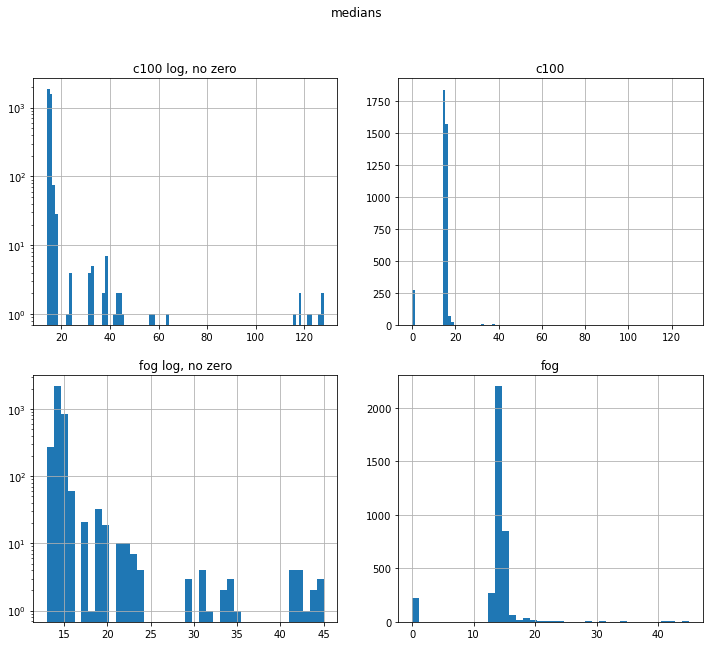

In [40]:
medi_copa = np.zeros((copa.shape[0], copa.shape[-1]))
medi_fopa = np.zeros((fopa.shape[0], fopa.shape[-1]))

for i,co in enumerate(copa):
    medi_copa[i] = np.median(co, axis=[0,1])
for i,fo in enumerate(fopa):
    medi_fopa[i] = np.median(fo, axis=[0,1])

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('medians')

tmp_medi = medi_copa.ravel(); tmp_medi = tmp_medi[tmp_medi!=0]
axes[0,0].hist(tmp_medi, bins=100)
axes[0,0].set_title('c100 log, no zero')
axes[0,0].set_yscale('log')
axes[0,0].grid()
# plt.show()
axes[0,1].hist(medi_copa.ravel(), bins=100)
axes[0,1].set_title('c100')
axes[0,1].grid()
# axes[].yscale('log')
print('c100')
print('0.95 quant:', np.quantile(tmp_medi, 0.95))
print('0.98 quant:', np.quantile(tmp_medi, 0.98))
print('0.02 quant:', np.quantile(tmp_medi, 0.02))
print('median median:', np.median(tmp_medi))

tmp_medi = medi_fopa.ravel(); tmp_medi = tmp_medi[tmp_medi!=0]
axes[1,0].hist(tmp_medi, bins=40)
axes[1,0].set_title('fog log, no zero')
axes[1,0].set_yscale('log')
axes[1,0].grid()
axes[1,1].hist(medi_fopa.ravel(), bins=40)
axes[1,1].set_title('fog')
axes[1,1].grid()
print('fog')
print('0.95 quant:', np.quantile(tmp_medi, 0.95))
print('0.98 quant:', np.quantile(tmp_medi, 0.98))
print('0.02 quant:', np.quantile(tmp_medi, 0.02))
print('median median:', np.median(tmp_medi))

# axes[].yscale('log')
plt.show()

In [37]:
(np.any(copa>128, axis=(1,2,3))).sum()/copa.shape[0]

0.009411764705882352

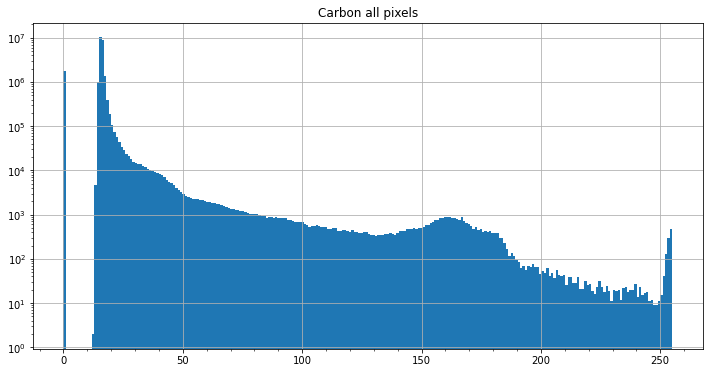

In [33]:
plt.figure(figsize=(12,6))
plt.hist(copa.ravel(), bins=256);
plt.yscale('log')
plt.title('Carbon all pixels')
plt.grid()
plt.minorticks_on()

In [38]:
(np.any(fopa>128, axis=(1,2,3))).sum()/fopa.shape[0]

0.021686746987951807

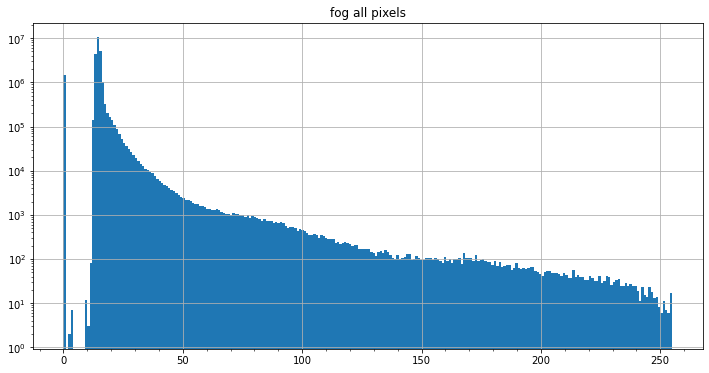

In [34]:
plt.figure(figsize=(12,6))
plt.hist(fopa.ravel(), bins=256);
plt.yscale('log')
plt.title('fog all pixels')
plt.grid()
plt.minorticks_on()

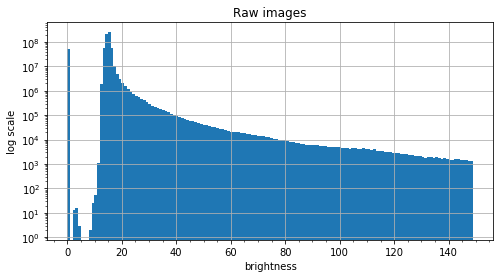

In [6]:
plt.figure(figsize=(8,4))
plt.hist(copa[copa<150].ravel(), bins=150)
plt.minorticks_on()
plt.grid()
plt.yscale('log')
plt.xlabel('brightness')
plt.ylabel('log scale')
plt.title('Raw images');

In [8]:
def shift_scale(imgs, remove_mode=True, scale=True, reject_peak=1.0, reject_bright=0.02, bright_thr=20):
    imgs = imgs.astype(np.float32) if scale else imgs.astype(np.int16)
    moda, meda = None, None
    drop_list = []
    if remove_mode:
        moda = np.zeros((imgs.shape[0],imgs.shape[-1]),dtype=np.int16)
        meda = np.zeros((imgs.shape[0],imgs.shape[-1]),dtype=np.int16)
        for i,im in enumerate(imgs):
            for j,pol_im in enumerate(im.T):
                if pol_im.any():
                    if (pol_im>256*reject_peak).any() and not i in drop_list: drop_list.append(i)
                    moda[i,j] = sp.stats.mode(pol_im, axis=None)[0]
                    meda[i,j] = np.median(pol_im)
                    imgs[i,...,j] -= moda[i,j]
        thr = min(np.quantile(meda, 1-reject_bright), bright_thr)
        for i,med in enumerate(meda):
            if (med>thr).any() and not i in drop_list: drop_list.append(i)
    if scale: imgs /= 256*reject_peak
    mask = np.ones(imgs.shape[0],dtype=bool)
    if drop_list: mask[drop_list]=False
    return imgs[mask], moda, meda, mask

In [9]:
start = datetime.now()
sopa, _, _, mask = shift_scale(copa, reject_peak=0.5, reject_bright=0.02, bright_thr=20)
copa = copa[mask]
sopa = sopa[:,20:60,20:60,:]
print(datetime.now()-start)

0:00:51.686065


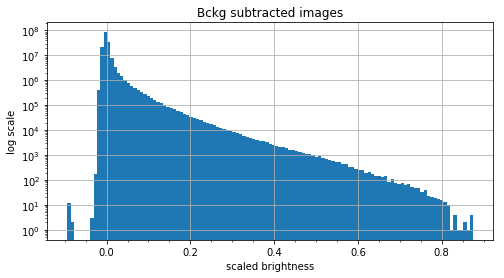

In [23]:
plt.figure(figsize=(8,4))
plt.hist(sopa.ravel(), bins=123)
plt.minorticks_on()
plt.grid()
plt.yscale('log')
plt.xlabel('scaled brightness')
plt.ylabel('log scale')
plt.title('Bckg subtracted images');

In [11]:
mask = np.ones(copa.shape[0], dtype=bool)
for i, im in enumerate(copa):
    if not im.all(): mask[i] = False
print(len(mask), mask.sum())

11373 8750


In [24]:
from skimage.restoration import denoise_wavelet
dopa = np.zeros_like(sopa[mask])
for i, so in enumerate(sopa[mask]):
    dopa[i] = denoise_wavelet(so, multichannel=True, wavelet='sym3')

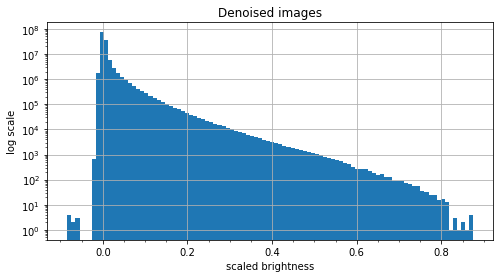

In [25]:
plt.figure(figsize=(8,4))
plt.hist(dopa.ravel(), bins=100)
plt.minorticks_on()
plt.grid()
plt.yscale('log')
plt.xlabel('scaled brightness')
plt.ylabel('log scale')
plt.title('Denoised images');

14.0
14.495942855482536
1.1505783584780742


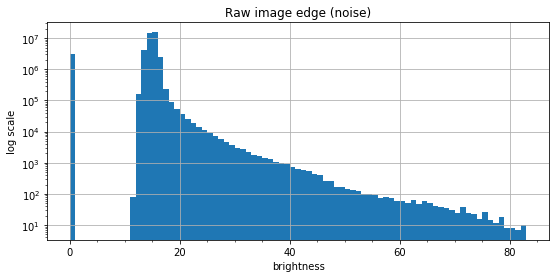

In [83]:
plt.figure(figsize=(9,4))
plt.hist(copa[:,:20,:20].ravel(), bins=83);
plt.yscale('log')
plt.xlabel('brightness')
plt.ylabel('log scale')
plt.title('Raw image edge (noise)')
plt.minorticks_on()
plt.grid()
print(np.median(copa[:,:20,:20]))
print(np.mean( (copa[:,:20,:20])[copa[:,:20,:20]!=0] ))
print(np.std( (copa[:,:20,:20])[copa[:,:20,:20]!=0] ))

22.0
10.34734165252833


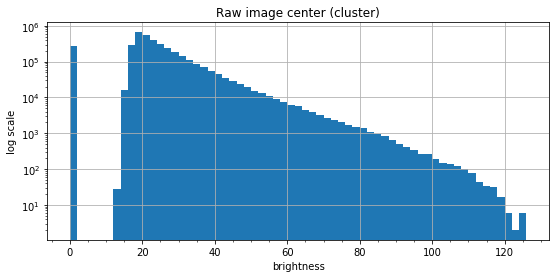

In [92]:
plt.figure(figsize=(9,4))
plt.hist(copa[:,37:43,37:43].ravel(), bins=63);
plt.yscale('log')
plt.xlabel('brightness')
plt.ylabel('log scale')
plt.title('Raw image center (cluster)');
plt.minorticks_on()
plt.grid()
print(np.median(copa[:,37:43,37:43]))
print(np.std( (copa[:,37:43,37:43])[copa[:,37:43,37:43]!=0] ))

In [68]:
22/14

1.5714285714285714

0.0
0.008872659


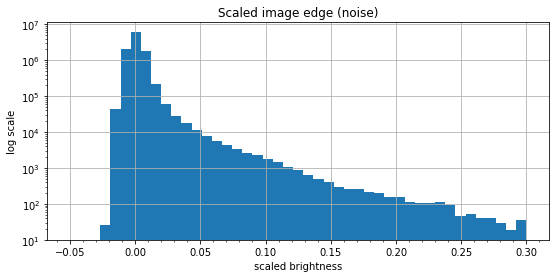

In [94]:
plt.figure(figsize=(9,4))
plt.hist(sopa[:,:10,:10].ravel(), bins=45, range=(-0.05,0.3));
plt.yscale('log')
plt.xlabel('scaled brightness')
plt.ylabel('log scale')
plt.title('Scaled image edge (noise)');
plt.minorticks_on()
plt.grid()
print(np.median(sopa[:,:10,:10]))
print(np.std(sopa[:,:10,:10]))

0.0546875
0.07368065


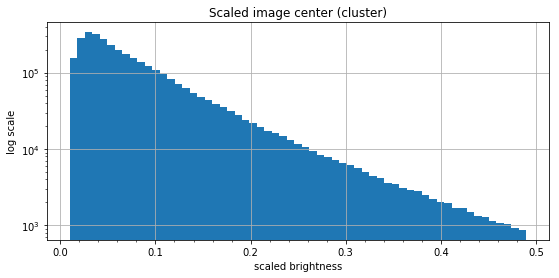

In [95]:
plt.figure(figsize=(9,4))
plt.hist(sopa[:,17:23,17:23].ravel(), bins=61, range=(0.01,0.49));
plt.yscale('log')
plt.xlabel('scaled brightness')
plt.ylabel('log scale')
plt.title('Scaled image center (cluster)');
plt.minorticks_on()
plt.grid()
print(np.median(sopa[:,17:23,17:23]))
print(np.std(sopa[:,17:23,17:23]))

In [67]:
54/9

6.0

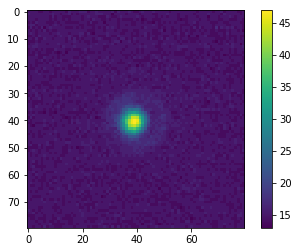

In [117]:
plt.imshow(copa[1116,...,1])
plt.colorbar()

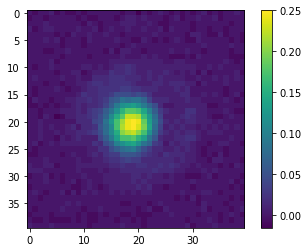

In [118]:
plt.imshow(sopa[1116,...,1])
plt.colorbar()

In [119]:
copa.shape

(11373, 80, 80, 9)

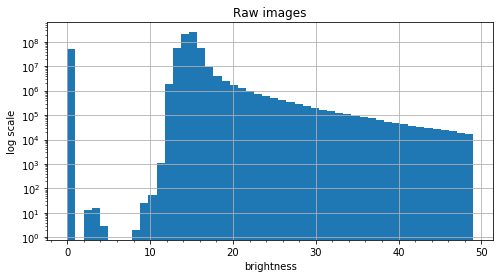

In [121]:
plt.figure(figsize=(8,4))
plt.hist(copa[copa<50].ravel(), bins=50)
plt.minorticks_on()
plt.grid()
plt.yscale('log')
plt.xlabel('brightness')
plt.ylabel('log scale')
plt.title('Raw images');

In [145]:
mask = copa.all(axis=(1,2))
tmask = []
for i, im in enumerate(copa):
    for j in range(im.shape[-1]):
        if mask[i,j] and (im[...,j]<10).any() and not i in tmask: tmask.append(i)
topa = copa[tmask]
topa.shape

(11, 80, 80, 9)

In [141]:
copa.all(axis=(1,2))

array([[ True,  True,  True, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True, False,  True, ...,  True,  True,  True]])

In [146]:
tmask

[9540, 9580, 9648, 9937, 9959, 9976, 10324, 10439, 10591, 10782, 11254]



 9540


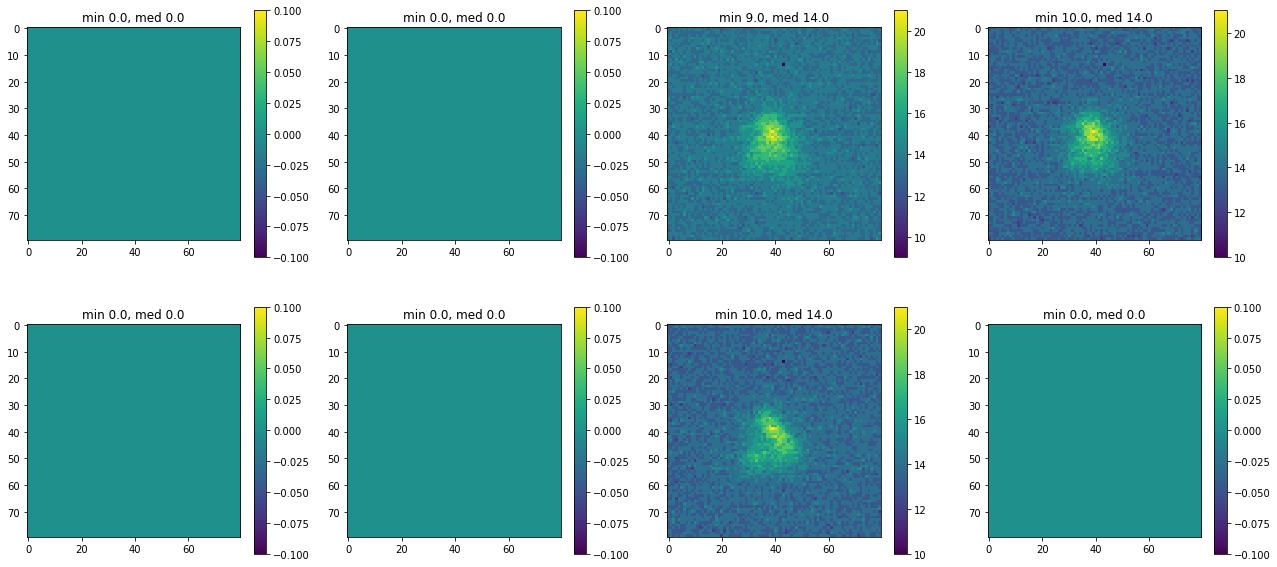



 9580


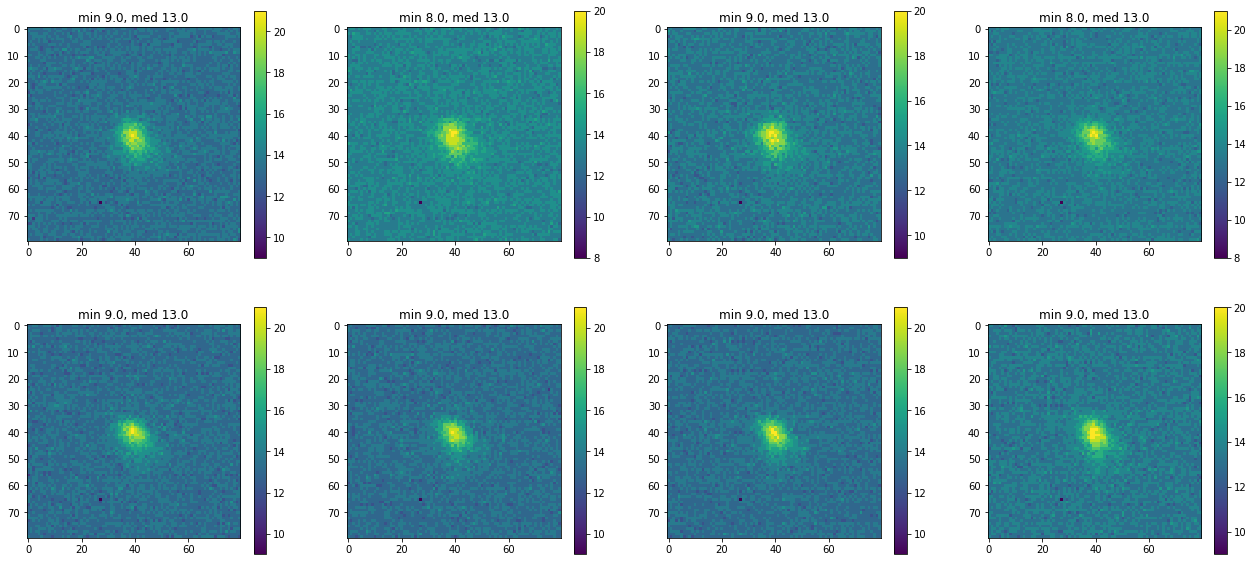



 9648


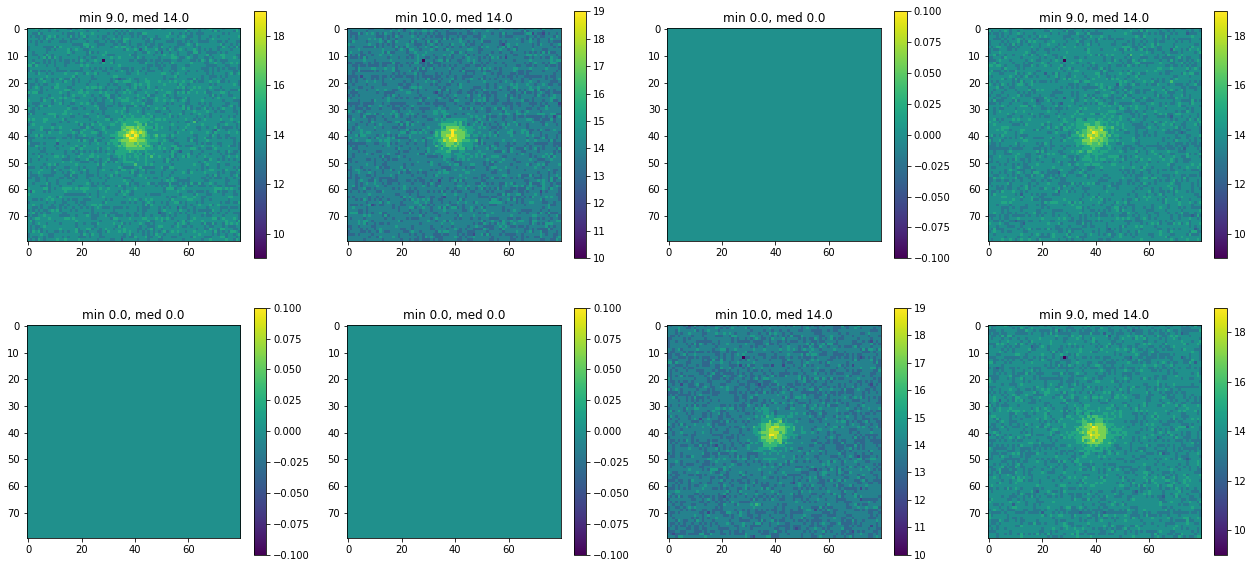



 9937


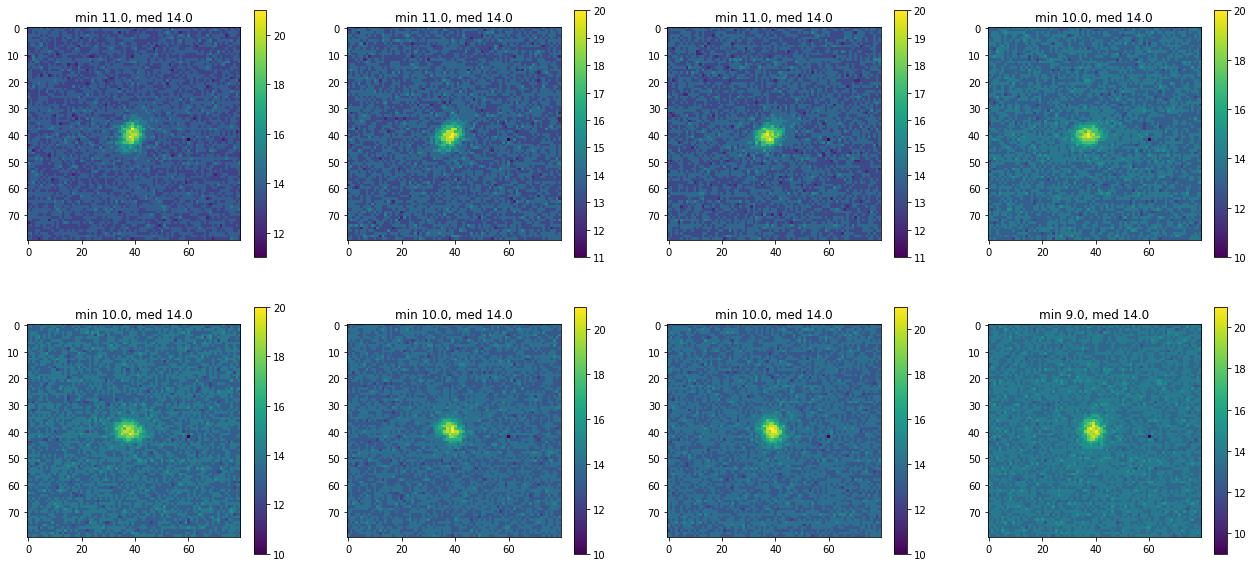



 9959


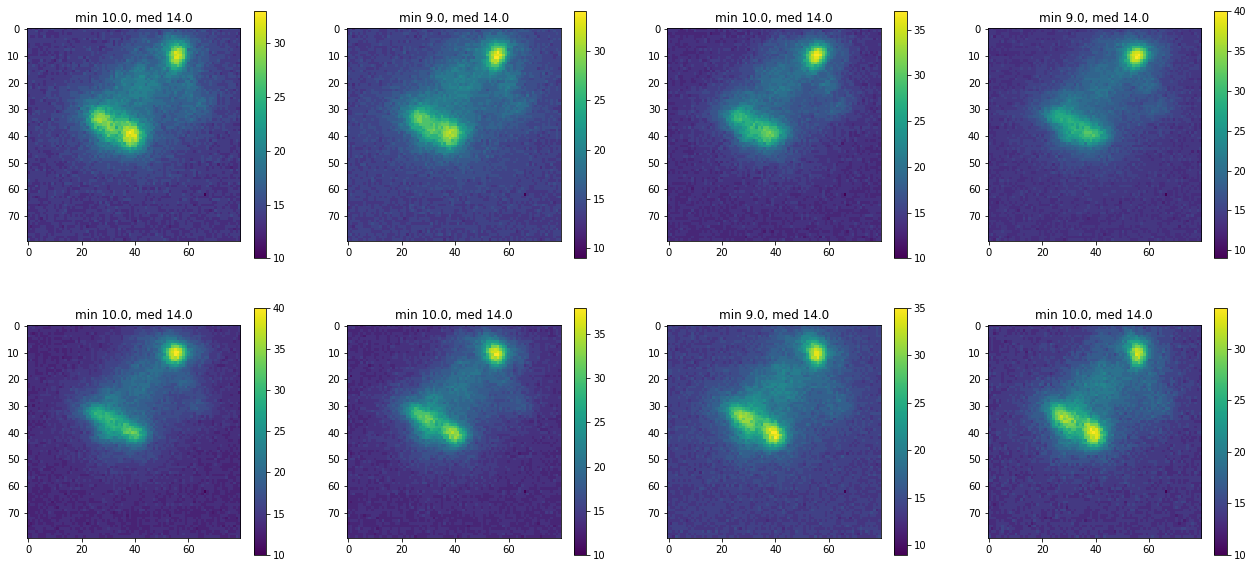



 9976


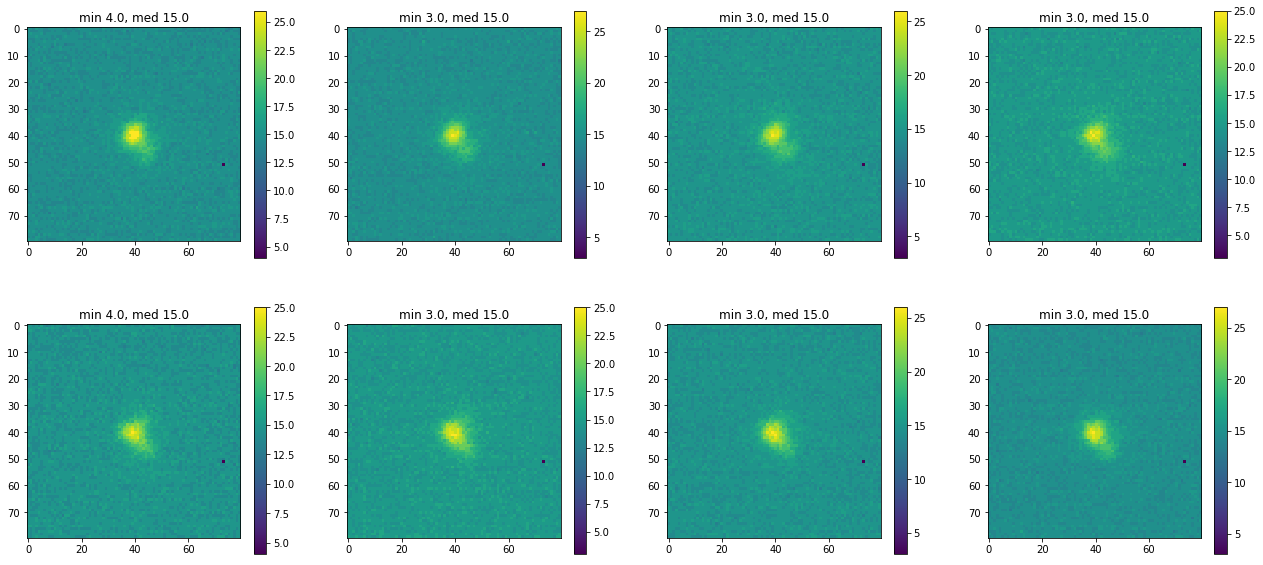



 10324


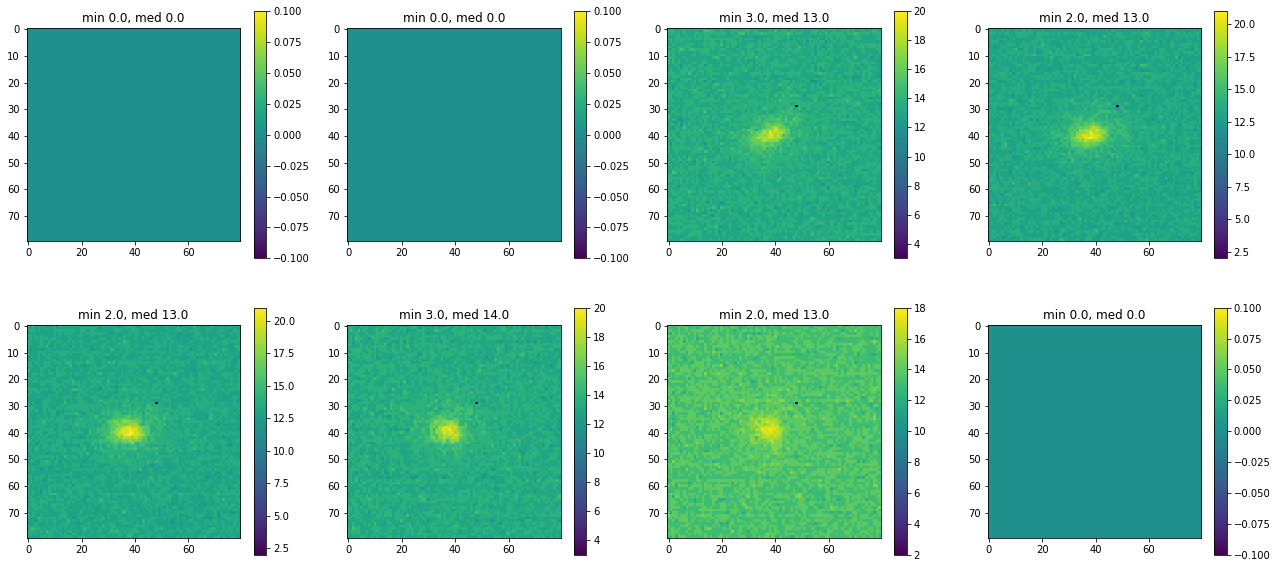



 10439


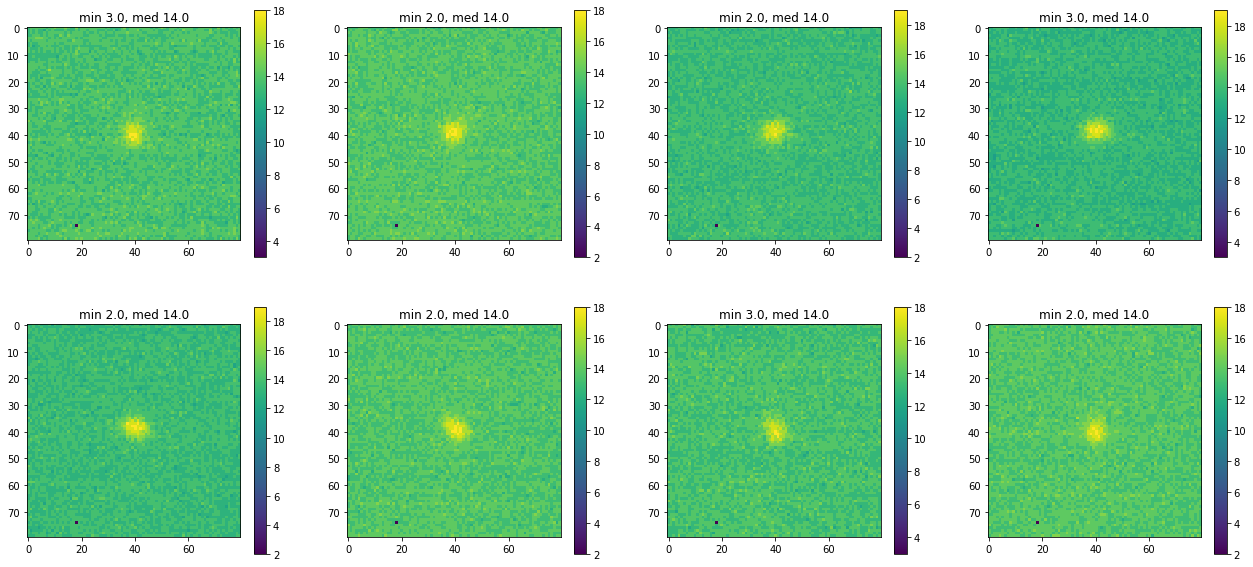



 10591


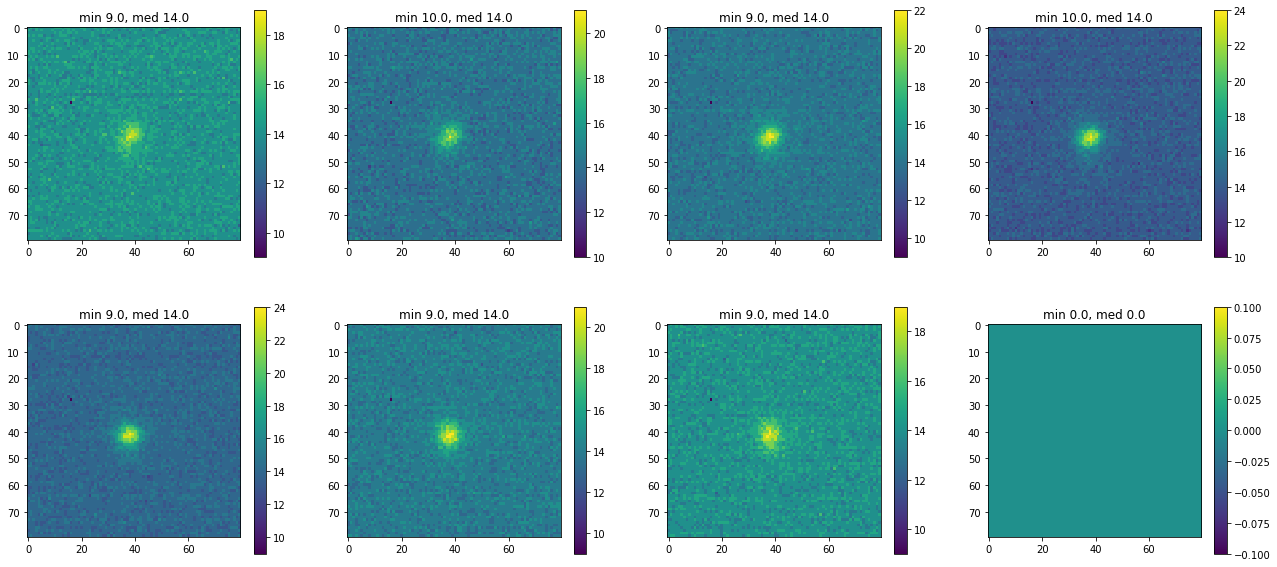



 10782


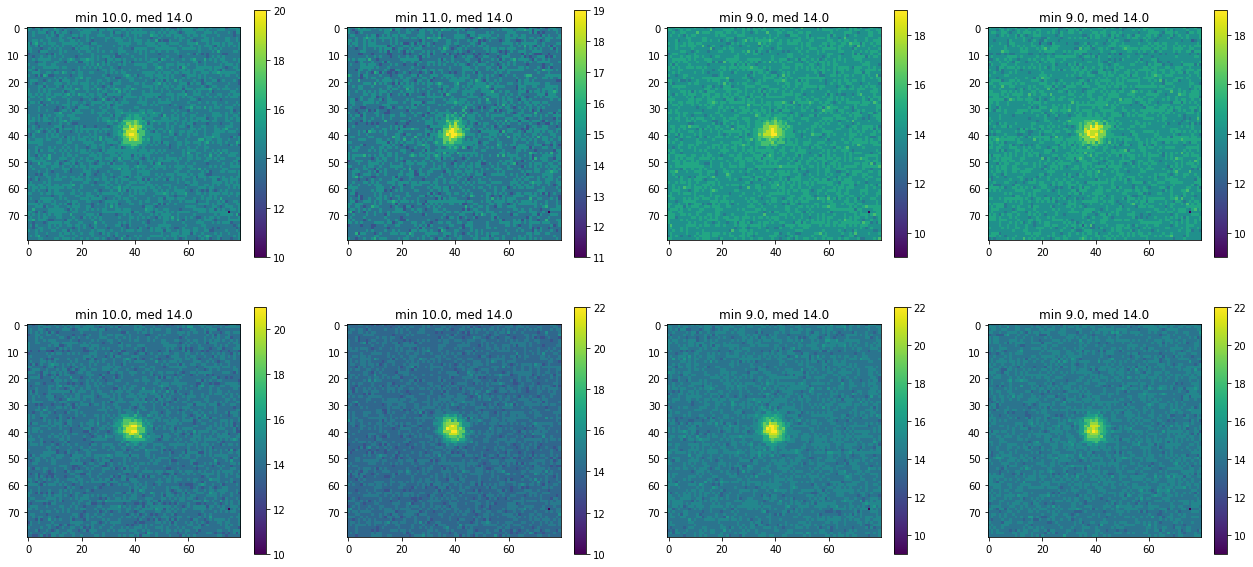



 11254


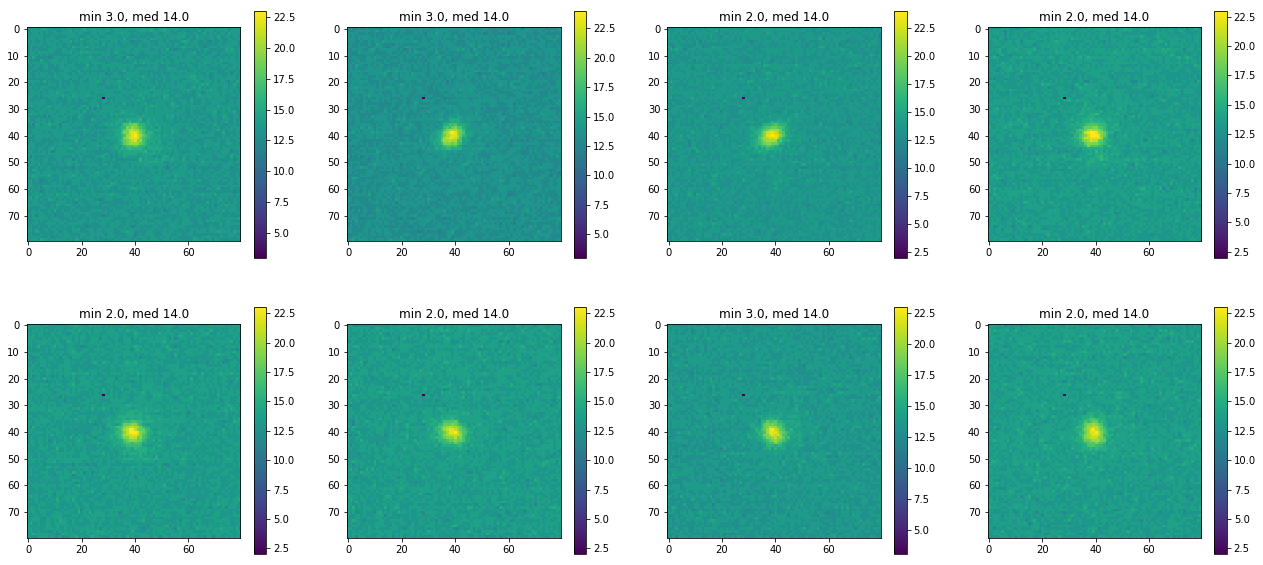

In [148]:
i=0
for im in topa:
    print('\n\n',tmask[i])
    fig, axes = plt.subplots(2, 4, figsize=(22, 10))
    #axes = np.ravel(axes)
    for row in range(2):
        for col in range(4):
            ax = axes[row, col]
            pcm = ax.imshow(im[...,4*row+col])
            fig.colorbar(pcm, ax=ax)
            ax.set_title('min '+str(im[...,4*row+col].min())+', med '+str(np.median(im[...,4*row+col])))
    plt.show()
    i += 1